# 3. SciPy 數值計算函數庫

In [1]:
%pylab inline
import scipy
from sympy import *
init_printing(use_unicode = True)

Populating the interactive namespace from numpy and matplotlib


In [2]:
scipy.__version__

'0.18.1'

## 3.1 常數和特殊函數

In [ ]:
# constant
from scipy import constants as C

In [ ]:
C.c
# meter/sec as unit

In [ ]:
# C.physical_constants['C']

In [ ]:
C.h

In [ ]:
C.physical_constants

In [ ]:
C.physical_constants['electron mass']

In [ ]:
# meter as unit
C.mile

In [ ]:
C.inch

In [ ]:
C.gram
# kg as unit

In [ ]:
C.pound

#### Special module

In [ ]:
import scipy.special as S

#### gamma
$\gamma(z) = \int_0^{\infty} t^{z-1} e^{-t} \, dt$

In [ ]:
S.gamma(4)

In [ ]:
S.gamma(0.5)

In [ ]:
S.gamma(1+1.j)

In [ ]:
S.gamma(1000)

In [ ]:
# gammaln
S.gammaln(1000)

In [ ]:
# log1p()
x = 1e-20
x + 1

In [ ]:
np.log(x)

In [ ]:
np.log(1 + 1e-20)

In [ ]:
S.log1p(1 + 1e-20)

In [ ]:
S.log1p(1e-20)

In [ ]:
# elllipj()
m = np.linspace(0.1, 0.9, 4)
u = np.linspace(-10, 10, 200)

results = S.ellipj(u[:, None], m[None, :])
[y.shape for y in results]

In [ ]:
plt.close('all')
fig = plt.figure(figsize = (12, 8))

ax = plt.subplot(2, 2, 1)
plt.plot(u, results[0])

ax = plt.subplot(2, 2, 2)
plt.plot(u, results[1])
 
ax = plt.subplot(2, 2, 3)
plt.plot(u, results[2])

ax = plt.subplot(2, 2, 4)
plt.plot(u, results[3])

## 3.2 擬合與最佳化 Optimize

### 3.2.1 非線性方程組求解

In [ ]:
# fsolve()

# 求解多元方程組
# 5x1 + 3 = 0
# 4x0*x0 - 2sin(x1 * x2) = 0
# x1 * x2 - 1.5 = 0

from math import sin, cos
from scipy import optimize

def f(x):
#     print(type(x))
    x0, x1, x2 = x 
    return [
        5 * x1 + 3, 
        4 * x0**2 - 2 * sin(x1 + x2), 
        x1 * x2 - 1.5
    ]

initial = (1, 1, 1)
result = optimize.fsolve(f, initial)

print(result)
f(result)

In [ ]:
# 使用 雅可比矩陣 
def j(x):
    x0, x1, x2 = x
    return [
        [0, 5, 0], 
        [8 * x0, -2 * 2 * cos(x1 * x2), -2 * x1 * cos(x1 * x2)],
        [0, x2, x1]
    ]

initial = (1, 1, 1)
result = optimize.fsolve(f, initial, fprime = j)
print(result)
f(result)

### 3.2.2 最小平方擬合 (Least Square Fitting)
$S(p) = \sum_{i = 1}^m \left[ y_i - f(x_i, p) \right]^2$ 

In [ ]:
# leastsq()
from scipy import optimize

x = np.array([8.19, 2.72, 6.39, 8.71, 4.7, 2.66, 3.78])
y = np.array([7.01, 2.78, 6.47, 6.71, 4.1, 4.23, 4.05])

def residuals(p):
    k, b = p
    return y - (k*x + b)

initial = (1, 1)
result = optimize.leastsq(residuals, initial)
solution = result[0]
k, b = solution 

print('solution', solution)
print('residuals', residuals(solution))

In [ ]:
xd = np.linspace(x.min(), x.max(), 200)
plt.plot(x, y, 'rx', label = 'samples')
plt.plot(xd, k*xd + b, label = 'leastsq fit')
plt.legend()

In [ ]:
import numpy as np
from scipy import optimize

X = np.array([ 8.19,  2.72,  6.39,  8.71,  4.7 ,  2.66,  3.78])
Y = np.array([ 7.01,  2.78,  6.47,  6.71,  4.1 ,  4.23,  4.05])

def residuals(p): #❶
    "計算以p為參數的直線和原始資料之間的誤差"
    k, b = p
    return Y - (k*X + b)

# leastsq使得residuals()的輸出陣列的平方和最小，參數的初值為[1,0]
r = optimize.leastsq(residuals, [1, 0]) #❷
k, b = r[0]
print("k =",k, "b =",b)

In [ ]:
from mpl_toolkits.mplot3d import Axes3D 
from matplotlib import cm 

K = np.linspace(0.6, 1, 10)
B = np.linspace(-0.25, 1, 10)
Km, Bm = np.meshgrid(K, B) 

def s(k, b):  
    x = np.array([8.19, 2.72, 6.39, 8.71, 4.7, 2.66, 3.78])
    y = np.array([7.01, 2.78, 6.47, 6.71, 4.1, 4.23, 4.05])
    return np.sum(((k*x + b) - y)**2)       

sf = np.vectorize(s)

Z = sf(Km, Bm)

# Plot the surface.
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(Km, Bm, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)
# ax.plot(k, b, sf(k, b))

In [ ]:
import matplotlib as ml
import matplotlib.pyplot as pl

# Plotting
fig = plt.figure(figsize=(12, 5))


# 2D
from matplotlib.patches import Rectangle 
ax1 = plt.subplot(121)

# samples
ax1.plot(X, Y, "o")

# fitting line
X0 = np.linspace(X.min()-1, X.max()+1, 2)
Y0 = k*X0 + b
ax1.plot(X0, Y0)

# error rectangles
for x, y in zip(X, Y):
    y2 = k*x+b
    rect = Rectangle((x,y), abs(y-y2), y2-y, facecolor="red", alpha=0.2)
    ax1.add_patch(rect)

ax1.set_aspect("equal")



# 3D
from mpl_toolkits.mplot3d import Axes3D

def S(k, b):
    "計算直線y=k*x+b和原始資料X、Y的誤差的平方和"
    error = np.zeros(k.shape)
    for x, y in zip(X, Y):
        error += (y - (k * x + b)) ** 2
    return error

#%figonly=最小化正方形面積之和（左），誤差曲面（右）
scale_k = 1.0
scale_b = 10.0
scale_error = 1000.0

ks, bs = np.mgrid[k - scale_k:k + scale_k:40j, b - scale_b:b + scale_b:40j]
error = S(ks, bs)

ax2 = fig.add_subplot(122, projection='3d')

ax2.plot_surface(ks / scale_k, bs / scale_b, error / scale_error, rstride=3, cstride=3, cmap="jet", alpha=0.5)
ax2.scatter([k], [b / scale_b], [S(k, b) / scale_error], c="r", s=20)
ax2.set_xlabel("$k$")
ax2.set_ylabel("$b$")
ax2.set_zlabel("$error$");

#### 對正弦波資料進行擬合

In [ ]:
# 波函數
def func(x, p):
    A, k, theta = p
    return A * np.sin(2 * np.pi * k * x + theta)

# 定義域
x = np.linspace(0, 2 * np.pi, 100)

# 波函數係數
A, k, theta = 10, 0.34, np.pi/6

# 產生樣本資料
y_samples = func(x, (A, k, theta))
np.random.seed(0)
y_samples_noised = y_samples + 2 * np.random.randn(len(x))  # noise



# Fitting
# 與波函數之誤差
def residuals(p, y, x):
    return y - func(x, p)

# initial coefficiences
p_initial = [7., 0.4, 0.]
p, _ = optimize.leastsq(residuals, x0 = p_initial, args = (y_samples_noised, x))


# result
print('real parameters', (A, k, theta))
print('fitting parameters', p[0])



# plotting
# plot samples
plt.plot(x, y_samples, 'o', label = 'samples')
plt.plot(x, y_samples_noised, 'o', label = 'samples with noise')

# plot fitting data
plt.plot(x, func(x, p), label = 'fitting data')

plt.legend(loc = 'best')

#### 曲線擬合

In [ ]:
# optimize.curve_fit(f, xdata, ydata, p0=None, sigma=None, absolute_sigma=False, check_finite=True, bounds=(-inf, inf), method=None, jac=None, **kwargs)

# Fitting
def func_curve(x, A, k, theta): 
    return A * np.sin(2 * np.pi * k * x + theta)

# initial coefficiences
p_initial = (7., 0.4, 0.)
p, _ = optimize.curve_fit(func_curve, xdata = x, ydata = y_samples_noised, p0 = p_initial)

# result
print('real parameters', (A, k, theta))
print('fitting parameters', p)



# plotting
# plot samples
plt.plot(x, y_samples, 'o', label = 'samples')
plt.plot(x, y_samples_noised, 'o', label = 'samples with noise')

# plot fitting data
plt.plot(x, func(x, p), label = 'fitting data')

plt.legend(loc = 'best')

### 3.2.3 Local minimum 局域最小值
#### Rosenbrock 函數
$f(x, y) = (1 - x)^2 + 100(y-x^2)^2$ 

In [ ]:
from mpl_toolkits.mplot3d import Axes3D 
from matplotlib import cm 

def rosenbrock(x, y):
    return (1 - x)**2 + 100 * (y - x**2)**2

x_range = 0.1
y_range = 0.1
center = (1., 1.)
steps = 20

x = np.linspace(center[0] - x_range, center[0] + x_range, steps)
y = np.linspace(center[1] - y_range, center[1] + y_range, steps)
X, Y = np.meshgrid(x, y) 
Z = rosenbrock(X, Y)  

# Plot the surface.
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)
ax.set_xlabel('X')
ax.set_ylabel('Y')

In [ ]:
class Rosenbrock(Function):
    nargs = 2

    @classmethod
    def eval(cls, x, y):
         return (1 - x)**2 + 100 * (y - x**2)**2

In [ ]:
from sympy import *
init_printing(use_unicode=True)

X, Y = symbols('X Y')
expr = (1 - X)**2 + 100 * (Y - X**2)**2
pprint(expr)

pprint(expr.diff(X))
pprint(expr.diff(Y)) 

[[expr.diff(X).diff(X), expr.diff(X).diff(Y)], [expr.diff(Y).diff(X), expr.diff(Y).diff(Y)]]

In [ ]:
def target_function(x, y):
    return (1 - x)**2 + 100 * (y - x**2)**2


class TargetFunction():
    
    def __init__(self):
        self.f_points = []
        self.fprime_points = []
        self.fhess_points = []
        
    def f(self, p):
        x, y = p.tolist()
        z = target_function(x, y)
        self.f_points.append((x, y))
        return z
    
    def fprime(self, p):
        x, y = p.tolist()
        self.fprime_points.append((x, y))
        dx = -2 + 2 * x - 400 * x * (y - x**2)
        dy = 200 * y - 200 * x**2
        return np.array([dx, dy])
    
    def fhess(self, p):
        x, y = p.tolist()
        self.fhess_points.append((x, y))
        return np.array([[2 * (600 * x**2 - 200 * y + 1), -400 * x], [-400 * x , 200]])
    
    
def fmin_demo(method):
    target = TargetFunction()
    init_point = (-1, -1)
    res = optimize.minimize(target.f, init_point, method = method, jac = target.fprime, hess = target.fhess)
    return res, [np.array(points) for points in (target.f_points, target.fprime_points, target.fhess_points)]

methods = ('Nelder-Mead', 'Powell', 'CG', 'BFGS', 'Newton-CG', 'L-BFGS-B')

for method in methods:
    res, (f_points, fprime_points, fhess_points) = fmin_demo(method)
    print('{:12s}: min = {:12g}, f count = {:3d}, fprime count = {:3d}, fhess count = {:3d}'.format(method, 
                                                                                                    float(res['fun']), 
                                                                                                    len(f_points),
                                                                                                    len(fprime_points),
                                                                                                    len(fhess_points)))

In [ ]:
res

In [ ]:
#%figonly=各種改善算法的搜尋路徑
def draw_fmin_demo(f_points, fprime_points, ax):
    xmin, xmax = -3, 3
    ymin, ymax = -3, 3
    Y, X = np.ogrid[ymin:ymax:500j,xmin:xmax:500j]
    Z = np.log10(target_function(X, Y))
#     zmin, zmax = np.min(Z), np.max(Z)

    ax.imshow(Z, extent=(xmin,xmax,ymin,ymax), origin="bottom", aspect="auto", cmap="gray")
    ax.plot(f_points[:,0], f_points[:,1], lw=1)
    ax.scatter(f_points[:,0], f_points[:,1], c=range(len(f_points)), s=50, linewidths=0)
    if len(fprime_points):
        ax.scatter(fprime_points[:, 0], fprime_points[:, 1], marker="x", color="w", alpha=0.5)
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax)

    
fig, axes = plt.subplots(2, 3, figsize=(9, 6))
methods = ("Nelder-Mead", "Powell", "CG", "BFGS", "Newton-CG", "L-BFGS-B")

for ax, method in zip(axes.ravel(), methods):
    res, (f_points, fprime_points, fhess_points) = fmin_demo(method)
    draw_fmin_demo(f_points, fprime_points, ax)
    ax.set_aspect("equal")
    ax.set_title(method)

### 3.2.4 計算全域最小值

In [ ]:
def func(x, p):
    A, k, theta = p
    return A * np.sin(2 * np.pi * k * x + theta)

def func_error(p, y, x):
    return np.sum((y - func(x, p))**2)

x = np.linspace(0, 2 * np.pi, 100)
p_samples = (10., 0.34, np.pi / 6.)

np.random.seed(42)
y_samples = func(x, p_samples)
y_samples_noised = y_samples + 2 * np.random.randn(len(x))

p = optimize.basinhopping(func_error, (1, 1, 1,), niter = 10, minimizer_kwargs = {'method': 'L-BFGS-B', 'args': (y_samples_noised, x)})
print(p)

plt.plot(x, y_samples, label = 'samples')
plt.plot(x, y_samples_noised, 'o', label = 'samples with noise')
plt.plot(x, func(x, p['x']), label = 'samples with noise')
plt.legend()

## 3.3 Linear Algebra 線性代數

In [ ]:
from scipy import linalg

m, n = 500, 50
A = np.random.rand(m, m)
B = np.random.rand(m, n)
X1 = linalg.solve(A, B)
X2 = np.dot(linalg.inv(A), B)
print(np.allclose(X1, X2))

%timeit linalg.solve(A, B)
%timeit  np.dot(linalg.inv(A), B)

In [ ]:
luf = linalg.lu_factor(A)
X3 = linalg.lu_solve(luf, B)

%timeit linalg.lu_solve(luf, B)

In [ ]:
M, N = 1000, 100
np.random.seed(42)
A = np.random.rand(M, M)
B = np.random.rand(M, N)
Ai = linalg.inv(A)
luf = linalg.lu_factor(A)

# %timeit linalg.inv(A)
%timeit np.dot(Ai, B)
# %timeit linalg.lu_factor(A)
%timeit linalg.lu_solve(luf, B)

### 3.3.2 Least Square 最小平方解

In [ ]:
# lstsq()
from numpy.lib.stride_tricks import as_strided

def make_data(m, n, noise_scale):
    np.random.seed(42)
    x = np.random.randn(m)
    h = np.random.standard_normal(n)
    y = np.convolve(x, h)
    yn = y + np.random.standard_normal(len(y)) * noise_scale * np.max(y)
    return x, yn, h

def solve_h(x, y, n):
    X = as_strided(x, shape = (len(x) - n + 1, n), strides = (x.itemsize, x.itemsize))
#     print(x.shape)
#     print(X.shape)
    Y = y[n-1:len(x)]
#     print(Y.shape)
    h = linalg.lstsq(X, Y)
#     print(h[0].shape)
    return h[0][::-1]

x, yn, h = make_data(1000, 100, 0.4)
# print(x.shape)
# print(yn.shape)
H1 = solve_h(x, yn, 120)
H2 = solve_h(x, yn, 80)

print('average erro of H1:', np.mean((np.abs(H1[:100] - h))))
print('average erro of H2:', np.mean((np.abs(h[:80] - H2))))

In [ ]:
#%figonly=實際的系統參數與最小二乘解的比較
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 4))
ax1.plot(h, linewidth=2, label='h')
ax1.plot(H1, linewidth=2, label='H1', alpha=0.7)
ax1.legend(loc="best", ncol=2)
ax1.set_xlim(0, len(H1))

ax2.plot(h, linewidth=2, label=u"h")
ax2.plot(H2, linewidth=2, label=u"H2", alpha=0.7)
ax2.legend(loc="best", ncol=2)
ax2.set_xlim(0, len(H2));

### 3.3.3 特徵值和特徵向量
$A x = \lambda x$

In [ ]:
A = np.array([[1, -0.3],[-.1, .9]])
A

In [ ]:
# np.linalg.eig(a)
eigen_values, eigen_vectors = scipy.linalg.eig(A)
eigen_values, eigen_vectors 

In [ ]:
np.allclose(A.dot(eigen_vectors[:, 0]),  eigen_values[0] * eigen_vectors[:, 0])

In [ ]:
np.allclose(A.dot(eigen_vectors[:, 1]),  eigen_values[1] * eigen_vectors[:, 1])

#### 廣義特徵向量 與  橢圓擬合
[Direct least-squares fitting of ellipses](https://www.microsoft.com/en-us/research/wp-content/uploads/2016/02/ellipse-pami.pdf)

In [ ]:
np.random.seed(42)

thetas = np.random.uniform(0, 2 * np.pi, 60)

alpha = 0.4
a = 0.5
b = 1.
x = 1. + a * np.cos(thetas) * np.cos(alpha) - b * np.sin(thetas) * np.sin(alpha)
y = 1. + a * np.cos(thetas) * np.sin(alpha) - b * np.sin(thetas) * np.cos(alpha)

# sample with noise
x += np.random.normal(0, 0.05, size = len(x))
y += np.random.normal(0, 0.05, size = len(y))
plt.plot(x, y, 'ro', alpha = 0.5, label = 'samples with noise')

# 解 廣義特徵值與特鄭向量
D = np.c_[x**2, x * y, y**2, x, y, np.ones_like(x)]
A = np.dot(D.T, D)
B = np.zeros(shape = (6, 6))
B[[0, 1, 2], [2, 1, 0]] = 2, -1, 2  # why?
values, vectors = scipy.linalg.eig(a = A, b = B)

# 看看那一組擬合的誤差最小
vectors = np.real(vectors)
errors = D.dot(vectors)**2
errors = np.mean(errors, axis = 0)
p = vectors[:, np.argmin(errors)]
print('p', p)

# Plot fitting
def ellipse(x, y, p):
    a, b, c, d, e, f = p
    z = a*x**2 + b*x*y + c*y**2 + d*x + e*y +f
    return z

X, Y = np.mgrid[0:2:100j, 0:2:100j]
Z = ellipse(X, Y, p)
plt.contour(X, Y, Z, levels = [0], label = 'fitting', lw = 1)
plt.legend() 

### 3.3.4 SVD 奇異值分解

In [ ]:
img_org = plt.imread('vinci_target.png')
plt.imshow(img_org)

In [ ]:
r, g, b =  np.rollaxis(img_org, 2) 
img = 0.2989 * r + 0.5870 * g + 0.1140 * b
plt.imshow(img)

In [ ]:
U, s, Vh = scipy.linalg.svd(img)
U.shape, s.shape, Vh.shape

In [ ]:
plt.semilogy(s)

In [ ]:
def composite(U, s, Vh, n):
    return np.dot(U[:, :n], s[:n, np.newaxis] * Vh[:n, :])

np.allclose(img, composite(U, s, Vh, len(s)))
np.allclose(img, composite(U, s, Vh, len(s)), atol = 1e-5)

In [ ]:
fig = plt.figure(figsize = (16, 8))

ax = plt.subplot(141)
ax.imshow(composite(U, s, Vh, 10))
ax = plt.subplot(142)
ax.imshow(composite(U, s, Vh, 20))
ax = plt.subplot(143)
ax.imshow(composite(U, s, Vh, 50))
ax = plt.subplot(144)
ax.imshow(composite(U, s, Vh, len(s)))

## 3.4 Statistics 統計

### 3.4.1 [Continuous Random Variable 連續機率分佈](https://zh.wikipedia.org/wiki/%E6%A6%82%E7%8E%87%E5%88%86%E5%B8%83#.E8.BF.9E.E7.BB.AD.E5.88.86.E5.B8.83)
#### 連續隨機變數

In [2]:
from scipy import stats

# continous variables
sorted([k for k, v in stats.__dict__.items() if isinstance(v, stats.rv_continuous)])

['alpha',
 'anglit',
 'arcsine',
 'argus',
 'beta',
 'betaprime',
 'bradford',
 'burr',
 'burr12',
 'cauchy',
 'chi',
 'chi2',
 'cosine',
 'dgamma',
 'dweibull',
 'erlang',
 'expon',
 'exponnorm',
 'exponpow',
 'exponweib',
 'f',
 'fatiguelife',
 'fisk',
 'foldcauchy',
 'foldnorm',
 'frechet_l',
 'frechet_r',
 'gamma',
 'gausshyper',
 'genexpon',
 'genextreme',
 'gengamma',
 'genhalflogistic',
 'genlogistic',
 'gennorm',
 'genpareto',
 'gilbrat',
 'gompertz',
 'gumbel_l',
 'gumbel_r',
 'halfcauchy',
 'halfgennorm',
 'halflogistic',
 'halfnorm',
 'hypsecant',
 'invgamma',
 'invgauss',
 'invweibull',
 'johnsonsb',
 'johnsonsu',
 'kappa3',
 'kappa4',
 'ksone',
 'kstwobign',
 'laplace',
 'levy',
 'levy_l',
 'levy_stable',
 'loggamma',
 'logistic',
 'loglaplace',
 'lognorm',
 'lomax',
 'maxwell',
 'mielke',
 'nakagami',
 'ncf',
 'nct',
 'ncx2',
 'norm',
 'pareto',
 'pearson3',
 'powerlaw',
 'powerlognorm',
 'powernorm',
 'rayleigh',
 'rdist',
 'recipinvgauss',
 'reciprocal',
 'rice',
 'semi

In [3]:
# stats()
stats.norm.stats()

(array(0.0), array(1.0))

In [4]:
# a statistic distribution instance
X = stats.norm(loc = 1., scale = 2.)
# X = stats.norm(loc = 0., scale = 1.)
X

In [5]:
# .stats()
X.stats()

(array(1.0), array(4.0))

In [6]:
# rvs
x = X.rvs(size = 10000)
x.mean(), x.var(), x.std(), x.sum()

In [7]:
# fit
# scipy.stats.norm.fit(data, **kwds)
scipy.stats.norm.fit(x)

#### 比較取樣樣本 與 X 的 pdf, cdf 理論值比較

10000

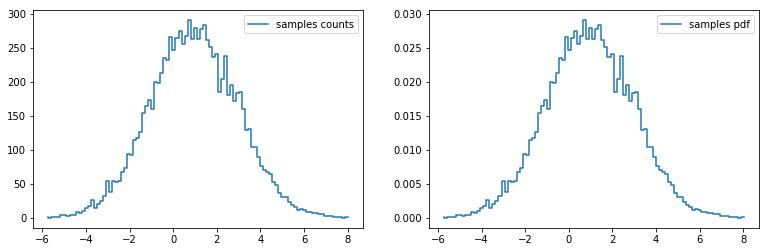

In [8]:
# np.histogram(a, bins=10, range=None, normed=False, weights=None, density=None)
counts, bin_edges = np.histogram(x, bins = 100, density = False)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2.
bin_intervals = bin_edges[1:] - bin_edges[:-1]

plt.figure(figsize = (13, 4))

# 各個 bin 區間，發生的次數
plt.subplot(121).step(bin_centers, counts, label = 'samples counts')
plt.legend()

# 各個 bin 區間，發生的機率
pdf = counts / counts.sum()
plt.subplot(122).step(bin_centers, pdf, label = 'samples pdf');
plt.legend()

counts.sum()

In [9]:
(X.pdf(bin_centers)).sum()

max error of pdf:  0.00470260526683


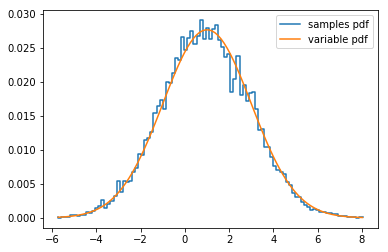

In [10]:
# 各個 bin 區間，發生的機率 之理論值
plt.step(bin_centers, pdf, label = 'samples pdf');
plt.plot(bin_centers, X.pdf(bin_centers) * bin_intervals, label = 'variable pdf')
plt.legend()
print('max error of pdf: ', np.abs((counts / counts.sum()) - X.pdf(bin_centers) * bin_intervals).max())

max error of cdf:  0.0139269851658


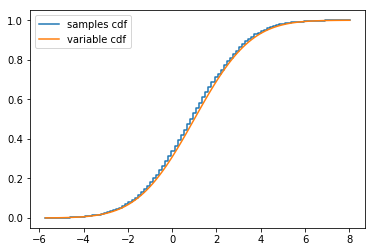

In [11]:
# pdf: 每個 bin 範圍中的數值 出現的機率 之 分佈函數
# cdf: 小於 特定一個值的數值 出現的機率 之 分佈函數

# 各個 bin 區間，發生的機率 之累積值
cdf = np.cumsum(pdf)
plt.step(bin_centers, cdf, label = 'samples cdf');
plt.plot(bin_centers, X.cdf(bin_centers), label = 'variable cdf')
plt.legend()
print('max error of cdf: ', np.abs(cdf - X.cdf(bin_centers)).max())

#### [Gamma distribution](https://en.wikipedia.org/wiki/Gamma_distribution)
伽瑪分布是統計學的一種連續機率函數。伽瑪分布中的參數α，稱為形狀參數，β稱為尺度參數。  
假設隨機變數X為 等到第α件事發生所需之等候時間

In [12]:
stats.gamma.stats(1.0)

(array(1.0), array(1.0))

In [13]:
stats.gamma.stats(2.)

(array(2.0), array(2.0))

In [14]:
# scale
X = stats.gamma(a = 2., scale = 2.)
X
# rv_frozen
# exception = a * scale, variance = a * scale**2

In [15]:
X.stats()

(array(4.0), array(8.0))

In [16]:
x = stats.gamma.rvs(a = 2., scale = 2., size = 4)
x

array([  5.56388894,   1.31625897,  12.80234334,   1.54796895])

In [17]:
stats.gamma.pdf(x, a = 2., scale = 2.)

array([ 0.08612621,  0.17039598,  0.00531173,  0.17846994])

In [18]:
X.pdf(x)

array([ 0.08612621,  0.17039598,  0.00531173,  0.17846994])

### 3.4.2 [Discrete Random Variable 離散機率分佈](https://zh.wikipedia.org/wiki/%E6%A6%82%E7%8E%87%E5%88%86%E5%B8%83#.E7.A6.BB.E6.95.A3.E5.88.86.E5.B8.83)
分佈函數的值域為離散的時候，我們稱之為機率分佈。  
使用 PMF (Probability Mass Function, 機率質量函數) 來描述其分佈情況。

In [19]:
from scipy import stats

# continous variables
sorted([k for k, v in stats.__dict__.items() if isinstance(v, stats.rv_discrete)])

['bernoulli',
 'binom',
 'boltzmann',
 'dlaplace',
 'geom',
 'hypergeom',
 'logser',
 'nbinom',
 'planck',
 'poisson',
 'randint',
 'skellam',
 'zipf']

In [20]:
x = range(1, 7)
p = (0.4, 0.2, 0.1, 0.1, 0.1, 0.1)

In [21]:
dice = stats.rv_discrete(values = (x, p))
dice

In [22]:
dice.rvs(size = 20)

array([3, 1, 1, 1, 1, 1, 1, 4, 1, 1, 5, 1, 1, 3, 6, 5, 6, 4, 1, 1])

### 驗證 [Central Limit Theorem (中央極限定理)](https://zh.wikipedia.org/wiki/%E4%B8%AD%E5%BF%83%E6%9E%81%E9%99%90%E5%AE%9A%E7%90%86)  
大量相互獨立的隨機變量，其**均值**的分布以常態分布為極限。  
這組定理是數理統計學和誤差分析的理論基礎，指出了大量隨機變量之**和**近似服從常態分布的條件。

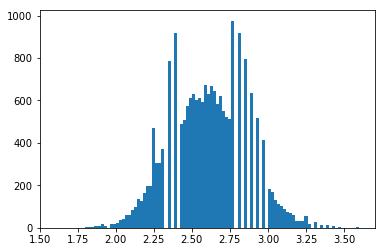

In [23]:
np.random.seed(42)
samples = dice.rvs(size = (20000, 50))
samples_means = np.mean(samples, axis = 1)
plt.hist(samples_means, bins = 100);

### 3.4.3 [KDE, Kernel Density Estimation 核心密度估計](https://zh.wikipedia.org/zh-tw/%E6%A0%B8%E5%AF%86%E5%BA%A6%E4%BC%B0%E8%AE%A1)

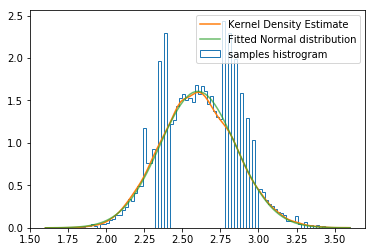

In [24]:
_, bins, step = plt.hist(samples_means, bins = 100, normed = True, histtype = 'step', label = u'samples histrogram')

x = np.linspace(bins[0], bins[-1], 100)

kde = stats.kde.gaussian_kde(samples_means)
plt.plot(x, kde(x), label = 'Kernel Density Estimate')

mean, std = stats.norm.fit(samples_means)
plt.plot(x, stats.norm.pdf(x, loc = mean, scale = std), label = 'Fitted Normal distribution', alpha = 0.7)

plt.legend();

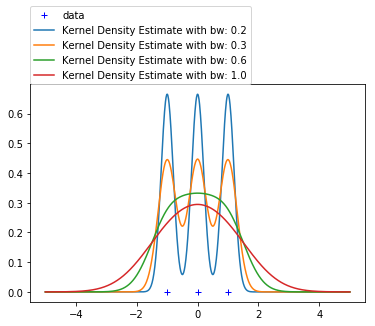

In [25]:
# data = samples_means
data = [-1, 0, 1]
x = linspace(-5, 5, 1000)

plt.plot(data, np.zeros(len(data)), 'b+', label = 'data')  # rug plot

for bw in [0.2, 0.3, 0.6, 1.]:
    kde = stats.kde.gaussian_kde(data, bw_method = bw)
    plt.plot(x, kde(x), label = 'Kernel Density Estimate with bw: ' + str(bw))
    
plt.legend(loc = (0, 1))    

### 3.4.4 Binomial, Poisson, Gamma distributions

#### [Binomial Distribution 二項分布](https://en.wikipedia.org/wiki/Binomial_distribution)
二項分布（英語：Binomial distribution）是n個獨立的是/非試驗中成功的次數的離散機率分布，其中每次試驗的成功機率為p。  
這樣的單次成功/失敗試驗又稱為伯努利試驗。實際上，當n = 1時，二項分布就是伯努利分布。二項分布是顯著性差異的二項試驗的基礎。  


$f(k; n, p) = P_r(X = k) = \left( _k^n \right) p^k (1 - p)^{n-k}$  
for k = 0, 1, 2, ..., n, where  
$\left( _k^n \right) = \frac{n!}{k! (n-k)!}$

In [26]:
X = stats.binom
X.pmf(range(6), 5, 1./6)

array([  4.01877572e-01,   4.01877572e-01,   1.60751029e-01,
         3.21502058e-02,   3.21502058e-03,   1.28600823e-04])

#### [Poisson Distribution](https://en.wikipedia.org/wiki/Poisson_distribution)
單位時間內隨機事件發生的次數的機率分佈。  
如某一服務設施在一定時間內受到的服務請求的次數，電話交換機接到呼叫的次數、汽車站台的候客人數、機器出現的故障數、自然災害發生的次數、DNA序列的變異數、放射性原子核的衰變數、雷射的光子數分佈等等。  


PMF: $f(k; \lambda) = \frac{e^{-\lambda} \, {\lambda^k}}{k!} $

$\lambda$ : 單位時間中，隨機事件的平均發生率

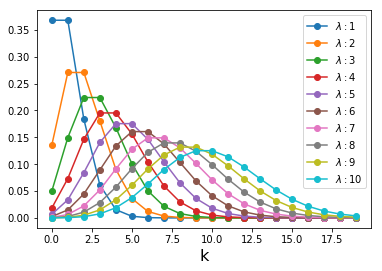

In [27]:
k = np.arange(20)
lambdas = np.arange(1, 11)

for l in lambdas:
    y_poisson = stats.poisson.pmf(k, l) 
    plt.plot(k, y_poisson, 'o-', label = '$\lambda: $' + str(l))

plt.gca().set_xlabel('k', fontsize = 16)
plt.legend();

0.00675531110335
0.000630175404978


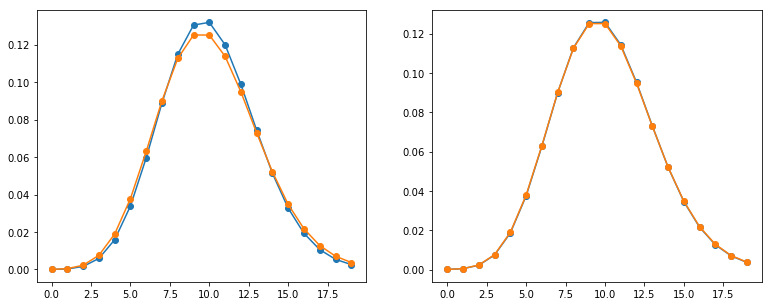

In [28]:
lambda_ = 10  # 單位時間內 特定事件發生的平均次數

k = np.arange(20)

n1, n2 = 100, 1000  # 單位時間內 實驗的次數
p_1 = lambda_ / n1  # 單位時間類 特定事件發生的機率
p_2 = lambda_ / n2
y_binomial_n1 = stats.binom.pmf(k, n1, p_1) # 實驗 n 次(單位時間內)之中，特定事件發生 k 次的機率分佈
y_binomial_n2 = stats.binom.pmf(k, n2, p_2)

y_poisson = stats.poisson.pmf(k, lambda_)   # 單位時間內，特定事件發生 k 次的 Poisson 機率分佈

print(np.max(np.abs(y_binomial_n1 - y_poisson)))
print(np.max(np.abs(y_binomial_n2 - y_poisson)))

plt.figure(figsize = (13, 5))

plt.subplot(121)
plt.plot(k, y_binomial_n1, 'o-', k, y_poisson, 'o-')

plt.subplot(122)
plt.plot(k, y_binomial_n2, 'o-', k, y_poisson, 'o-');

0.00675531110335
0.000630175404978


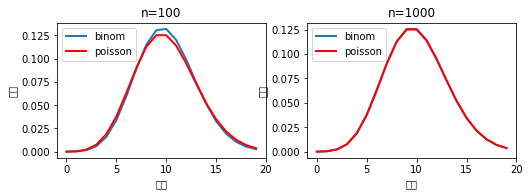

In [29]:
#%fig=當n足夠大時二項分佈和泊松分佈近似相等
lambda_ = 10.0
x = np.arange(20)

n1, n2 = 100, 1000

y_binom_n1 = stats.binom.pmf(x, n1, lambda_ / n1)
y_binom_n2 = stats.binom.pmf(x, n2, lambda_ / n2)
y_poisson = stats.poisson.pmf(x, lambda_)
print(np.max(np.abs(y_binom_n1 - y_poisson)))
print(np.max(np.abs(y_binom_n2 - y_poisson)))
#%hide
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7.5, 2.5))

ax1.plot(x, y_binom_n1, label=u"binom", lw=2)
ax1.plot(x, y_poisson, label=u"poisson", lw=2, color="red")
ax2.plot(x, y_binom_n2, label=u"binom", lw=2)
ax2.plot(x, y_poisson, label=u"poisson", lw=2, color="red")
for n, ax in zip((n1, n2), (ax1, ax2)):
    ax.set_xlabel(u"次數")
    ax.set_ylabel(u"機率")
    ax.set_title("n={}".format(n))
    ax.legend()
fig.subplots_adjust(0.1, 0.15, 0.95, 0.90, 0.2, 0.1);

#### 用亂數模擬 Poisson 分佈

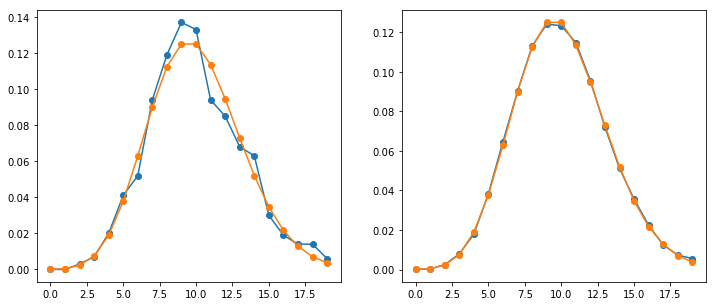

In [30]:
np.random.seed(42)

def sim_poisson(lambda_, time):
    occurances = np.random.uniform(0, time, size = lambda_ * time)  # time 時間內，事件發生的時間點
    count, time_edges = np.histogram(occurances, bins = time, range = (0, time))  # 每單位時間內，事件發生的次數
    dist, count_edges = np.histogram(count, bins = 20, range = (0, 20), density = True)  # 每單位時間內，事件發生的次數 應該遵守 Poisson 分佈
    x = count_edges[:-1]  # 事件發生的次數
    poisson = stats.poisson.pmf(x, lambda_)
    return x, poisson, dist

lambda_ = 10
times = 1000, 50000
x1, poisson1, dist1 = sim_poisson(lambda_, times[0])
x2, poisson2, dist2 = sim_poisson(lambda_, times[1])

plt.figure(figsize = (12, 5))
plt.subplot(121).plot(x1, dist1, 'o-', x1, poisson1, 'o-')
plt.subplot(122).plot(x2, dist2, 'o-', x2, poisson2, 'o-');

time=1000, max_error=0.01964230201602718
time=50000, max_error=0.001798012894964722


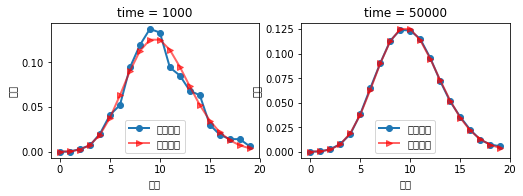

In [31]:
#%fig=類比泊松分佈
np.random.seed(42)

def sim_poisson(lambda_, time):
    t = np.random.uniform(0, time, size=lambda_ * time) #❶
    count, time_edges = np.histogram(t, bins=time, range=(0, time))  #❷
    dist, count_edges = np.histogram(count, bins=20, range=(0, 20), density=True) #❸
    x = count_edges[:-1]
    poisson = stats.poisson.pmf(x, lambda_)
    return x, poisson, dist

lambda_ = 10      
times = 1000, 50000
x1, poisson1, dist1 = sim_poisson(lambda_, times[0])
x2, poisson2, dist2 = sim_poisson(lambda_, times[1])
max_error1 = np.max(np.abs(dist1 - poisson1))
max_error2 = np.max(np.abs(dist2 - poisson2))         
print("time={}, max_error={}".format(times[0], max_error1) )
print( "time={}, max_error={}".format(times[1], max_error2) )
#%hide
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7.5, 2.5))

ax1.plot(x1, dist1, "-o", lw=2, label=u"統計結果")
ax1.plot(x1, poisson1, "->", lw=2, label=u"泊松分佈", color="red", alpha=0.6)
ax2.plot(x2, dist2, "-o", lw=2, label=u"統計結果")
ax2.plot(x2, poisson2, "->", lw=2, label=u"泊松分佈", color="red", alpha=0.6)

for ax, time in zip((ax1, ax2), times):
    ax.set_xlabel(u"次數")
    ax.set_ylabel(u"機率")
    ax.set_title(u"time = {}".format(time))
    ax.legend(loc="lower center")
    
fig.subplots_adjust(0.1, 0.15, 0.95, 0.90, 0.2, 0.1);

#### [Gamma Distribution](https://en.wikipedia.org/wiki/Gamma_distribution)
事件之間的時間間隔應該呈現 Gamma 分佈  

PMF: $f(x; k, \lambda) = \frac {1}{\Gamma \left(k\right) \, \theta ^k} \, x^{k-1} \, e^{-\frac{x}{\theta}}$   

if $\lambda = \frac{1}{\theta}$,  then:  

PMF: $f(x; k, \lambda) = \frac {1}{\Gamma \left(k\right)} \, x^{k-1} \, \lambda^k \, e^{-\lambda x }$   
 
$\lambda$ : 單位時間中，隨機事件的平均發生率

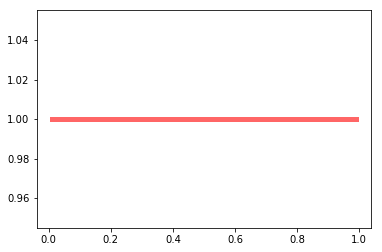

In [32]:
from scipy.stats import uniform
x = np.linspace(uniform.ppf(0.01), uniform.ppf(0.99), 100)
plt.plot(x, uniform.pdf(x), 'r-', lw=5, alpha=0.6, label='uniform pdf')

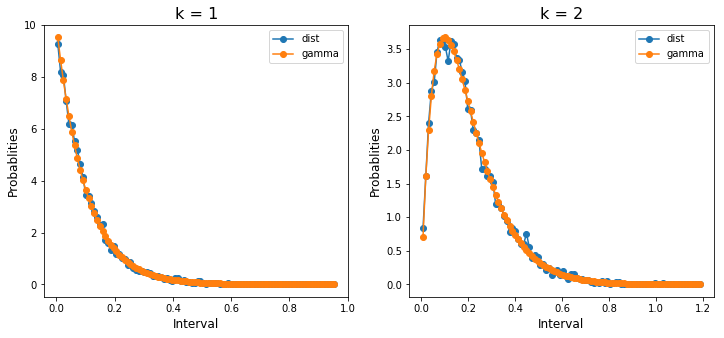

In [33]:
np.random.seed(42)

def sim_gamma(lambda_, time, k):
    occurances = np.random.uniform(0, time, size = lambda_ * time)
    occurances.sort()
    intervals = occurances[k:] - occurances[:-k]  # 相隔 k 個事件的兩個事件，之時間間隔
    dist, interval_edges = np.histogram(intervals, bins = 100, density = True)  # 事件間隔時間 的 histogram
    x = (interval_edges[:-1] +  interval_edges[1:]) /2.
    gamma = stats.gamma.pdf(x, k, scale = 1. / lambda_)
    return x, dist, gamma

lambda_ = 10  # 每個單位時間（秒）發生次數大約 10次
time = 1000  # 觀察區間 1000秒
ks = 1, 2  # 相隔幾個事件

plt.figure(figsize = (12, 5))

for k in ks:
    x, dist, gamma = sim_gamma(lambda_, time, k)
    ax = plt.subplot(1, 2, k)
    ax.plot(x, dist, 'o-', label = 'dist')
    ax.plot(x, gamma, 'o-',  label = 'gamma') 
    ax.set_title('k = ' + str(k), fontsize = 16)
    ax.set_xlabel('Interval', fontsize = 12)
    ax.set_ylabel('Probablities', fontsize = 12)
    plt.legend()

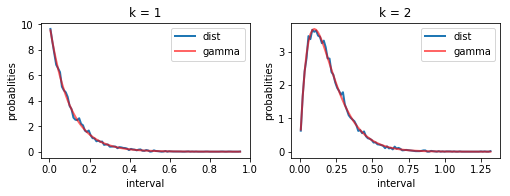

In [34]:
#%fig=類比伽瑪分佈
def sim_gamma(lambda_, time, k):
    t = np.random.uniform(0, time, size=lambda_ * time) #❶
    t.sort()  #❷
    interval = t[k:] - t[:-k] #❸
    dist, interval_edges = np.histogram(interval, bins=100, density=True) #❹
    x = (interval_edges[1:] + interval_edges[:-1])/2  #❺
    gamma = stats.gamma.pdf(x, k, scale=1.0/lambda_) #❺
    return x, gamma, dist

lambda_ = 10
time = 1000
ks = 1, 2
x1, gamma1, dist1 = sim_gamma(lambda_, time, ks[0])
x2, gamma2, dist2 = sim_gamma(lambda_, time, ks[1])
#%hide
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7.5, 2.5))

ax1.plot(x1, dist1,  lw=2, label=u"dist")
ax1.plot(x1, gamma1, lw=2, label=u"gamma", color="red", alpha=0.6)
ax2.plot(x2, dist2,  lw=2, label=u"dist")
ax2.plot(x2, gamma2, lw=2, label=u"gamma", color="red", alpha=0.6)

for ax, k in zip((ax1, ax2), ks):
    ax.set_xlabel(u"interval")
    ax.set_ylabel(u"probablities")
    ax.set_title(u"k = {}".format(k))
    ax.legend(loc="upper right")
    
fig.subplots_adjust(0.1, 0.15, 0.95, 0.90, 0.2, 0.1);

#### 模擬 等公車

In [35]:
T = 100000  # 總模擬時間
A_count = int(T / 5)
B_count = int(T / 10)
A_time = np.random.uniform(0, T, size = A_count)
B_time = np.random.uniform(0, T, size = B_count)
bus_time = np.hstack((A_time, B_time))
bus_time.sort()
N = 200000
passenger_time = np.random.uniform(bus_time[0], bus_time[-1], size = N)
idx = np.searchsorted(bus_time, passenger_time)
np.mean(bus_time[idx] - passenger_time) * 60  # 平均等待秒數

In [36]:
np.mean(np.diff(bus_time)) * 60

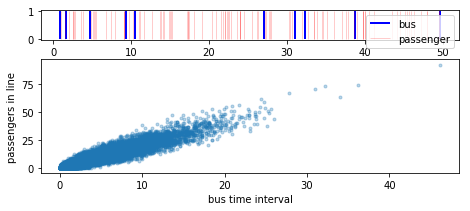

In [37]:
#%figonly=觀察者偏差
import matplotlib.gridspec as gridspec
plt.figure(figsize=(7.5, 3))

G = gridspec.GridSpec(10, 1)
ax1 = plt.subplot(G[:2,  0])
ax2 = plt.subplot(G[3:, 0])

ax1.vlines(bus_time[:10], 0, 1, lw=2, color="blue", label=u"bus")
ptime = np.random.uniform(bus_time[0], bus_time[9], 100)
ax1.vlines(ptime, 0, 1, lw=1, color="red", alpha=0.2, label=u"passenger")
ax1.legend()

count, bins = np.histogram(passenger_time, bins=bus_time)  # 每兩班公車的間隔中，有幾個 passenger 在等待
ax2.plot(np.diff(bins), count, ".", alpha=0.3, rasterized=True)  # 每個間隔中，有幾個 passenger 在等待，繪製 scatter 圖
ax2.set_xlabel(u"bus time interval")
ax2.set_ylabel(u"passengers in line");

#### 平均等待時間 公式：  
$\frac {\int_0^\infty \frac{x}{2} x \Gamma(x) \, dx}  {\int_0^\infty x \Gamma(x) \, dx}$

In [38]:
from scipy import integrate

T = np.inf
t = 10. / 3  # 兩輛公車平均間隔時間
bus_interval = stats.gamma(1, scale = t)
n, _ = integrate.quad(lambda x: 0.5 * x**2 * bus_interval.pdf(x), 0, T)
d, _ = integrate.quad(lambda x: 1.0 * x * bus_interval.pdf(x), 0, T)
(n / d ) * 60

### 3.4.5 [學生 t 分佈](https://en.wikipedia.org/wiki/Student%27s_t-distribution) 與 [t 檢驗](https://en.wikipedia.org/wiki/Student%27s_t-test)
**學生t-分布（Student's t-distribution）**，可簡稱為**t分布**，用於根據**小樣本**來**估計呈常態分布且方差未知的總體的均值***。如果總體方差已知（例如在樣本數量足夠多時），則應該用常態分布來估計總體均值。  

它是**對兩個樣本均值差異進行顯著性測試**的學生t檢定的基礎。學生t檢定改進了Z檢定（Z-test），因為Z檢定以母體標準差已知為前提。雖然在樣本數量大（超過30個）時，可以應用Z檢定來求得近似值，但Z檢定用在小樣本會產生很大的誤差，因此必須改用學生t檢定以求準確。  

在**母體標準差未知**的情況下，不論樣本數量大或小皆可應用學生t檢定。在待比較的數據有三組以上時，因為誤差無法壓低，此時可以用變異數分析（ANOVA）代替學生t檢定。  


---  
從平均值為 $\mu$ 的常態分佈中取出 size = n 的樣本，計算樣本平均值 $\bar{x}$ 與樣本方差 $s$  
$\bar{x} = \frac{x_1 + ... + x_n}{n}$  
$s^2 = \frac{1}{n - 1} \sum_{i = 1}^n (x_1 - \bar{x})^2$  

則 $ t = \frac{\bar{x} - \mu}{\frac{s}{\sqrt {n}}}$ 服從 df = n - 1 的學生t分佈  

t值是抽選樣本的平均值與整體樣本的期望值的差異 經過正規化之後的數值，可以用來描述取出的樣本與整體樣本之間的差異

#### 模擬學生t分佈

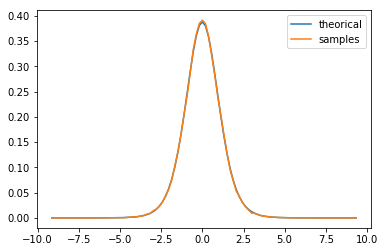

In [39]:
mu = 0.0
n = 10
samples = stats.norm(loc = mu).rvs(size = (100000, n))
samples_means = np.mean(samples, axis = 1)
samples_variances = np.var(samples, ddof = 1, axis = 1)

samples_t_scores = (samples_means - mu) / np.sqrt(samples_variances) * np.sqrt(n)
t_dist, bins = np.histogram(samples_t_scores, bins = 100, density = True)

x = (bins[1:] + bins[:-1]) / 2
bin_intervals = bins[1:] - bins[:-1]
plt.plot(x, stats.t(n - 1).pdf(x), label = 'theorical')
plt.plot(x, t_dist, label = 'samples')
plt.legend()

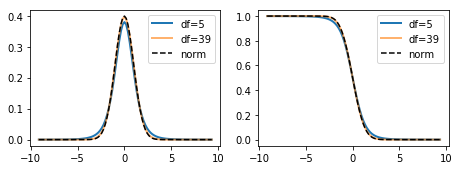

In [40]:
#%figonly=當`df`增大，學生t-分佈趨向於正態分佈
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7.5, 2.5))
ax1.plot(x, stats.t(6-1).pdf(x), label=u"df=5", lw=2)
ax1.plot(x, stats.t(40-1).pdf(x), label=u"df=39", lw=2, alpha=0.6)
ax1.plot(x, stats.norm.pdf(x), "k--", label=u"norm")
ax1.legend()

ax2.plot(x, stats.t(6-1).sf(x), label=u"df=5", lw=2)
ax2.plot(x, stats.t(40-1).sf(x), label=u"df=39", lw=2, alpha=0.6)
ax2.plot(x, stats.norm.sf(x), "k--", label=u"norm")
ax2.legend();

#### 用學生t分佈來檢測樣本的平均值

In [41]:
np.random.seed(42)
n = 30
mu = 1.
samples = stats.norm(loc = mu, scale = 0.8).rvs(size = n) 

In [42]:
mu_H0 = 0.5
t_score = (np.mean(samples) - mu_H0) / np.std(samples, ddof = 1) * np.sqrt(n)
t_score

In [43]:
t, p = stats.ttest_1samp(samples, popmean = mu_H0)
t, p
# p < 0.05, so H0 is rejected

In [44]:
mu_H0 = 1.

t, p = stats.ttest_1samp(samples, popmean = mu_H0)
t, p
# p > 0.05, H0 is retained.

t: 2.65858434088
p: 0.0126377022571


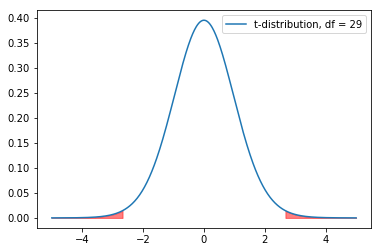

In [45]:
mu_H0 = 0.5

x = np.linspace(-5, 5, 500)
y = stats.t(n - 1).pdf(x)
plt.plot(x, y, label = 't-distribution, df = ' + str(n - 1))

t, p = stats.ttest_1samp(samples, popmean = mu_H0)
print('t:', t)
print('p:', p)

mask = x < -np.abs(t) 
plt.fill_between(x[mask], y[mask], color = 'r', alpha = 0.5)
mask = x > np.abs(t) 
plt.fill_between(x[mask], y[mask], color = 'r', alpha = 0.5)


plt.legend()

#### 用積分驗證p值

In [46]:
from scipy import integrate

def get_p(n, t):
    p = integrate.quad(lambda x: stats.t(n-1).pdf(x), -np.inf, -np.abs(t))
    return p[0] * 2

get_p(n, t) 

#### 用亂數驗證 p 值

In [47]:
m = 2000
n = 30
mu = 0.5
r = stats.norm(loc = mu, scale = 0.8).rvs(size = (m, n))  # 隨機 常態分佈樣本 m x n

mu_H0 = mu
tr = (np.mean(r, axis = 1) - mu_H0) / np.std(r, ddof = 1, axis = 1) * sqrt(n)  # m 組 size = n 的隨機樣本 的 t-scores
ts = (np.mean(samples) - mu_H0) / np.std(samples) * np.sqrt(n)  # 單一組樣本的 t-score
np.mean(np.abs(tr) > np.abs(ts))  # m 組 size = n 的隨機樣本中， 有多少比率的樣本組的 t-score 比單一樣本的 t-score 還大

#### 檢驗兩個樣本的母體 平均值是否相同

In [48]:
np.random.seed(42)

s1 = stats.norm(loc = 1., scale = 1.).rvs(size = 20)
s2 = stats.norm(loc = 1.5, scale = 0.5).rvs(size = 20)
s3 = stats.norm(loc = 1.5, scale = 0.5).rvs(size = 25)

print('s1, s2', stats.ttest_ind(s1, s2, equal_var = False))
print('s2, s3', stats.ttest_ind(s2, s3, equal_var = True))
print('s1, s3', stats.ttest_ind(s1, s3, equal_var = False))     

s1, s2 Ttest_indResult(statistic=-2.2391470627176755, pvalue=0.033250866086743665)
s2, s3 Ttest_indResult(statistic=-0.59466985218561719, pvalue=0.55518058758105393)
s1, s3 Ttest_indResult(statistic=-2.6875953532704799, pvalue=0.012731960612388266)


### 3.4.6 [Chi Square distribution (卡方分布)](https://en.wikipedia.org/wiki/Chi-squared_distribution)
**卡方分布（chi-square distribution[2], χ²-distribution）**是機率論與統計學中常用的一種機率分布。  

k個獨立的標準常態分布變量的**平方和**服從自由度為k的卡方分布。  

${\chi}^2=\frac{1}{d}\sum_{k=1}^{n} \frac{(O_k - E_k)^2}{E_k}$  

卡方分布是一種特殊的**伽瑪分布**，是統計推斷中應用最為廣泛的機率分布之一，例如假設檢驗和信賴區間的計算。  
由卡方分布延伸出來**[皮爾森卡方檢定](https://zh.wikipedia.org/wiki/%E7%9A%AE%E7%88%BE%E6%A3%AE%E5%8D%A1%E6%96%B9%E6%AA%A2%E5%AE%9A)**常用於：  
1. 樣本某性質的比例分布與母體理論分布的適配度；
2. 同一母體的兩個隨機變量是否獨立；
3. 二或多個母體同一屬性的同質性檢定。 
 

#### 透過亂數驗證 Chi 分佈

max error: 0.00413605201391


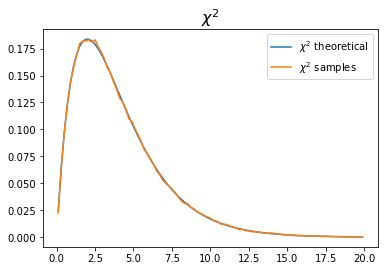

In [62]:
k = 4
a = stats.norm.rvs(size = (300000, k))
cs = np.sum(a**2, axis = 1)

dist, bins = np.histogram(cs, bins = 100, range = (0, 20), density = True)
x = (bins[:-1] + bins[1:]) / 2
chi2_dist = stats.chi2.pdf(x, df = k)

plt.plot(x, chi2_dist, label = '$\chi^2$ theoretical')
plt.plot(x, dist, label =  '$\chi^2$ samples')
plt.gca().set_title('$\chi^2$', fontsize = 16)
plt.legend()
print('max error:', np.max(np.abs(dist - chi2_dist)))

#### 色球 被抽出的次數 與 期望次數 的差異 呈現卡方分佈
袋子中有五個球，顏色不同，抽中的機率相同。從中選 N 次，統計每種顏色抽中的次數 Oi  

$\chi^2 = \sum_{i = 1}^k \frac{(O_i - E)^2}{E}$   

$E = \frac{E}{5}$ 是每顆球被抽中的期望次數

服從自由度為 4 的卡方分佈

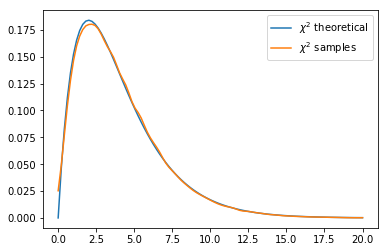

In [87]:
np.random.seed(42)

ball_count = 5
repeat_count = 60000
n, k = 100, ball_count
ball_ids = np.random.randint(0, k, size = (repeat_count, n))
E = n / ball_count
counts = np.apply_along_axis(func1d = np.bincount, axis = 1, arr = ball_ids, minlength = k)

cs2 = np.sum((counts - E)**2 / E, axis = 1) 
pdf = stats.kde.gaussian_kde(cs2)

x = np.linspace(0, 20, 100)
chi2_dist = stats.chi2(df = k - 1).pdf(x)
plt.plot(x, chi2_dist, label = '$\chi^2$ theoretical')
plt.plot(x, pdf(x), label = '$\chi^2$ samples')
plt.legend();

### 卡方檢定
預設的 H0 是： 樣本是呈 uniform 分佈的

In [130]:
def choose_balls(probabilities, size):
    r = stats.rv_discrete(values = (range(len(probabilities)), probabilities))
    s = r.rvs(size = size)
    counts = np.bincount(s, minlength = len(probabilities))
    return counts

np.random.seed(42)
counts1 = choose_balls([.18, .24, .25, .16, .17], 400)
counts2 = choose_balls([0.2] * 5, 400)

chi1, p1 = stats.chisquare(counts1)  # 預設的 H0 是 樣本是呈 uniform 分佈的
chi2, p2 = stats.chisquare(counts2)

print("chi1 =", chi1, "p1 =", p1)
print("chi2 =", chi2, "p2 =", p2)

# p1 < 0.05, 所以第一組樣本不是 uniform 分佈 （拒絕H0)
# p1 < 0.05, 所以第二組樣本 不能拒絕H0

chi1 = 11.375 p1 = 0.0226576012398
chi2 = 2.55 p2 = 0.635705452704


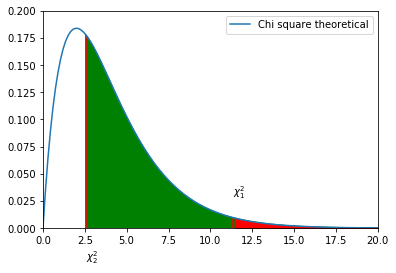

In [131]:
x = np.linspace(0, 30, 200)
chi2_rv = stats.chi2(df = 4)
plt.plot(x, chi2_rv.pdf(x), label = 'Chi square theoretical')

plt.vlines(chi1, 0, chi2_rv.pdf(chi1), color = 'red')
plt.vlines(chi2, 0, chi2_rv.pdf(chi2), color = 'red')

plt.fill_between(x[x >= chi2], chi2_rv.pdf(x[x >= chi2]), color = 'green')
plt.fill_between(x[x >= chi1], chi2_rv.pdf(x[x >= chi1]), color = 'red')

plt.text(chi1, 0.03, '$\chi_1^2$')
plt.text(chi2, -0.03, '$\chi_2^2$')

plt.xlim(0, 20)
plt.ylim(0, 0.2)

plt.legend();

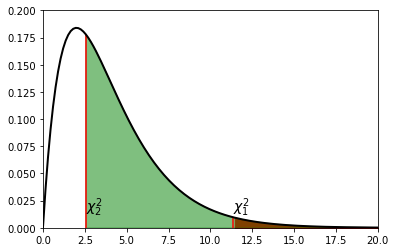

In [132]:
#%figonly=卡方檢驗計算的機率為陰影部分的面積
x = np.linspace(0, 30, 200)
CHI2 = stats.chi2(k - 1)
plt.plot(x, CHI2.pdf(x), "k", lw=2)
plt.vlines(chi1, 0, CHI2.pdf(chi1), 'red')
plt.vlines(chi2, 0, CHI2.pdf(chi2), 'red')
plt.fill_between(x[x>chi1], 0, CHI2.pdf(x[x>chi1]), color="red", alpha=1.0)
plt.fill_between(x[x>chi2], 0, CHI2.pdf(x[x>chi2]), color="green", alpha=0.5)
plt.text(chi1, 0.015, r"$\chi^2_1$", fontsize=14)
plt.text(chi2, 0.015, r"$\chi^2_2$", fontsize=14)
plt.ylim(0, 0.2)
plt.xlim(0, 20);

#### 用卡方檢定 檢驗 二維資料

In [134]:
table = [[43, 9], [44, 4]]
chi2, p, dof, expected = stats.chi2_contingency(table)
chi2, p, dof, expected 

(1.0724852071005921, 0.30038477039056599, 1, array([[ 45.24,   6.76],
        [ 41.76,   6.24]]))

In [135]:
stats.fisher_exact(table)

## 3.5 數值積分

### 3.5.1 球的體積

In [147]:
def half_circle(x):
    return np.sqrt(1 - x**2)

N = 1000
x = np.linspace(-1, 1, N) 
dx = x[1] - x[0]
y = half_circle(x) 
A = np.sum(dx * y) * 2
A 

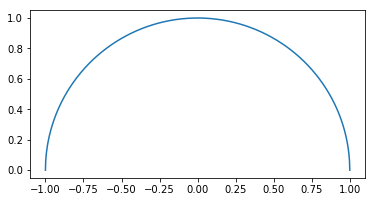

In [155]:
# trapz
plt.plot(x, y)
ax = plt.gca()
ax.set_aspect('equal')

# scipy.integrate.trapz(y, x=None, dx=1.0, axis=-1)
scipy.integrate.trapz(y, x) * 2 

In [159]:
# scipy.integrate.quad()
area, error = scipy.integrate.quad(half_circle, x.min(), x.max())
area * 2

#### 半球體積
二重積分公式  

$\int_{-1}^{1} \int_{-\sqrt{1-x^2}}^{\sqrt{1-x^2}} \sqrt{1 - x^2 - y^2} \, dy \, dx$

In [164]:
from scipy.integrate import quad, dblquad, tplquad

def half_sphere(x, y, r = 1):
    return np.sqrt(r**2 - x**2 - y**2)

volume, error = dblquad(half_sphere, -1, 1, 
                        lambda x: - half_circle(x), 
                        lambda x:   half_circle(x))

volume

In [ ]:
quad()

### 3.5.2 解 [常微分方程組 (Ordinary Differential Equation，簡稱ODE)](https://zh.wikipedia.org/wiki/%E5%B8%B8%E5%BE%AE%E5%88%86%E6%96%B9%E7%A8%8B)

#### [Lorenz system](https://en.wikipedia.org/wiki/Lorenz_system)

$\frac{dx}{dt} = \sigma (y - x)$  

$\frac{dy}{dt} = x (\rho - z) - y$  

$\frac{dz}{dt} = xy - \beta z$  

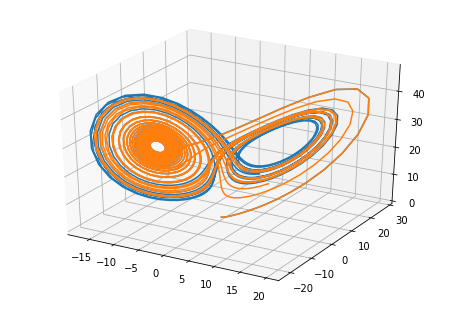

In [185]:
from scipy.integrate import odeint

def lorenz(w, t, sigma, rho, beta):
#     列出位置向量 w 和三個參數 p, r, b
#     計算出 dx/dt, dy/dt, dz/dt
    x, y, z = w.tolist()
    return sigma * (y - x), x * (rho - z) - y, x * y - beta * z

t = np.arange(0, 30, 0.02)  # 時間軸點
# 呼叫 odeint 對 lorenz 求解，使用兩的不同的初值
sigma, rho, beta = 10., 28., 8./3.
track1 = odeint(lorenz, (0.0, 1.0, 0.), t, args = (sigma, rho, beta))
track2 = odeint(lorenz, (0.0, 1.01, 0.), t, args = (sigma, rho, beta))

# plotting
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.plot(track1[:, 0], track1[:, 1], track1[:, 2])
ax.plot(track2[:, 0], track2[:, 1], track2[:, 2]);

### 3.5.3 ode 類別
彈簧阻尼系統的求解

$\dot{x} = u$  
$\dot{u} = (F - kx - bu) / m$  

x: 滑桿的位置  
$\ddot{x}$ 為 位移對時間的二次導數，即滑桿的加速度  
$\dot{x}$ 為 滑桿的速度  
m 為滑桿的質量  
b 為阻尼係數  
k 為彈簧的係數  
F 為外部施加於滑桿的控制力  

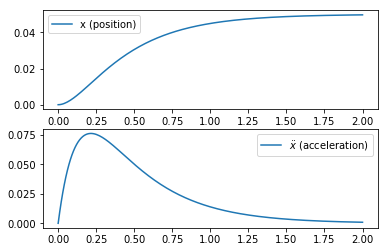

In [210]:
def mass_spring_damper(xu, t, m, k, b, F):
    x, u = xu.tolist()
    dx = u
    du = (F - k * x - b * u) / m
    return dx, du
    
t = np.linspace(0, 2, 200)  # 時間軸點   
args = (m, k, b, F) = 1., 20., 10., 1.
initial_status = (0, 0)
result = odeint(mass_spring_damper, initial_status, t, args = args)

plt.subplot(211).plot(t, result[:, 0], label = 'x (position)')
plt.legend();
plt.subplot(212).plot(t, result[:, 1], label = '$\ddot{x}$ (acceleration)')
plt.legend();

#### 使用 ode 類別

True

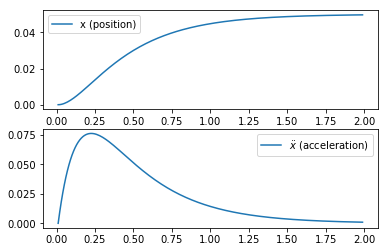

In [226]:
from scipy.integrate import ode

class MassSpringDamper():
    def __init__(self, m, k, b, F):
        self.m, self.k, self.b, self.F = m, k, b, F
        
    def f(self, t, xu):
        x, u = xu.tolist()
        dx = u
        du = (self.F - self.k * x - self.b * u) / self.m
        return [dx, du]
    
args = (m, k, b, F) = 1., 20., 10., 1.
initial_status = (0, 0)
dt = 0.01

system = MassSpringDamper(*args)

r = ode(system.f)  # 建立 ode 物件
r.set_integrator('vode', method = 'bdf')  # 設定積分器與演算法
r.set_initial_value(initial_status, 0)  # 設定初始位置與時間

t = []  # 時間軸點
result2 = [initial_status] # 位置序列

while r.successful() and r.t + dt < 2:  # 積分到 時間超過 2
    r.integrate(r.t + dt)
    t.append(r.t)
    result2.append(r.y)
    
result2 = np.array(result2)

plt.subplot(211).plot(t, result2[:-1, 0], label = 'x (position)')
plt.legend();
plt.subplot(212).plot(t, result2[:-1, 1], label = '$\ddot{x}$ (acceleration)')
plt.legend()

np.allclose(result, result2, atol = 1e-3)

#### [PID 控制](https://zh.wikipedia.org/wiki/PID%E6%8E%A7%E5%88%B6%E5%99%A8)

kp, ki, kd: 300.0 100.0 20.0


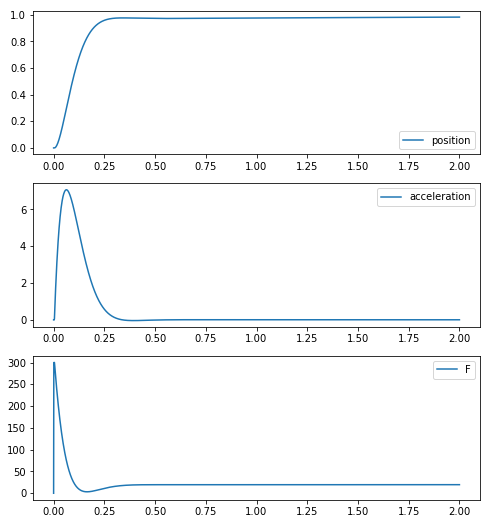

In [307]:
class PID():
    
    def __init__(self, kp, ki, kd, dt):
        self.kp, self.ki, self.kd, self.dt =  kp, ki, kd, dt
        self.last_error = None
        self.status = 0.
        
    def update(self, error):
        p = self.kp * error  # 比例項 的修正量
        i = self.ki * self.status  # 積分項 的修正量        
        if self.last_error is None:
            d = 0.
        else:
            d = self.kd * (error - self.last_error) / self.dt  # 微分項 的修正量        
        self.status += error * self.dt  # 積分項的累加
        self.last_error = error  # 當下誤差
        return p + i + d  # 總和的修正量
    
    
def pid_control_system(kp, ki, kd, dt, target = 1.0):
    args = (m, k, b, F) = 1., 20., 10., 0.0 
    system = MassSpringDamper(*args)  # 模擬的彈簧
    pid = PID(kp, ki, kd, dt)  # PID 控制器
    init_status = (0., 0.) 
    
    r = ode(system.f)  # ODE 積分器
    r.set_integrator('vode', method = 'bdf')  # 選擇 積分器與演算法
    r.set_initial_value(init_status, 0)  # 設定初始狀態
    
    t = [0]
    result = [init_status]
    F_arr = [0]
    
    while r.successful() and r.t + dt < 2:
        r.integrate(r.t + dt)  # 積分計算
        t.append(r.t)  # 紀錄時間
        result.append(r.y)  # 紀錄結果
        error = target -r.y[0]  # 誤差 
        F = pid.update(error)  # PID 計算 修正量
        system.F = F  # 改變系統 F
        F_arr.append(F)
        
    result = np.array(result)
    t = np.array(t)
    F_arr = np.array(F_arr)
    
    return t, result, F_arr

args = (kp, ki, kd, dt, target) = (300., 100., 20., 0.001, 1.)
print('kp, ki, kd:', kp, ki, kd)
t, result, F_arr = pid_control_system(*args)
 
fig, axes = plt.subplots(3, 1)
fig.set_size_inches(8, 9)
axes[0].plot(t, result[:, 0], label = 'position')
axes[0].legend()
axes[1].plot(t, result[:, 1], label = 'acceleration')
axes[1].legend()
axes[2].plot(t, F_arr, label = 'F')
axes[2].legend();   

#### 最佳化

/home/wei/anaconda3/lib/python3.6/site-packages/scipy/optimize/_basinhopping.py:282: OptimizeWarning: Unknown solver options: approx_grad
  return self.minimizer(self.func, x0, **self.kwargs)


kp, ki, kd: 53.6970611207 82.1356445739 2.78360087562
CPU times: user 1min 50s, sys: 140 ms, total: 1min 50s
Wall time: 1min 50s


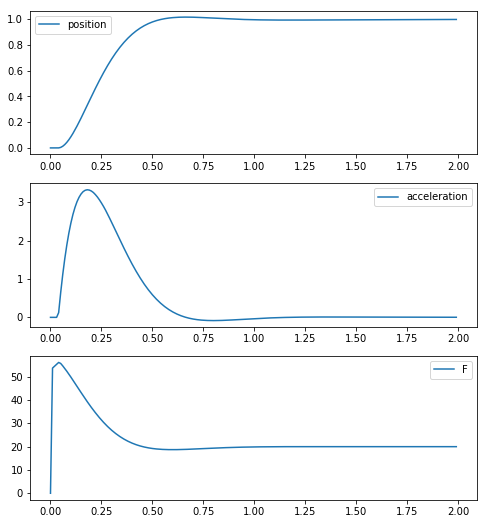

In [308]:
%%time

from scipy import optimize
# from scipy.integrate import quad
 
dt = 0.01
target = 1.

def eval_func(k):
    kp, ki, kd = k
    args = (kp, ki, kd, dt, target)
    t, result, F_arr = pid_control_system(*args)
    return np.sum(np.abs(result[:, 0] - target))  # 與 target 誤差的總和 越小越好
#     quad(

# basinhopping 最佳化
k_initial = (10., 10., 10.)
kargs = {'method': 'L-BFGS-B', 'bounds': [(10, 400), (10, 200), (1, 100)], "options":{"approx_grad":True}}
# kargs = {'method': 'L-BFGS-B', 'bounds': [(10, 400), (10, 200), (1, 100)]}
k = optimize.basinhopping(eval_func, k_initial, niter = 10, minimizer_kwargs = kargs)

kp, ki, kd = k.x
print('kp, ki, kd:', kp, ki, kd)

args = (kp, ki, kd, dt, target) 
t, result, F_arr = pid_control_system(*args)
 
fig, axes = plt.subplots(3, 1)
fig.set_size_inches(8, 9)
axes[0].plot(t, result[:, 0], label = 'position')
axes[0].legend()
axes[1].plot(t, result[:, 1], label = 'acceleration')
axes[1].legend()
axes[2].plot(t, F_arr, label = 'F')
axes[2].legend();     

## 3.6 Signal Processing 訊號處理

### 3.6.1 中值濾波

np.all(x2 == x3) True


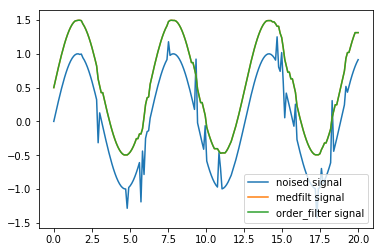

In [319]:
# medfilt
# order_filter

from scipy import signal 

t = np.linspace(0, 20, 200)
x = np.sin(t)
x[np.random.randint(0, len(t), 20)] += np.random.randn(20) * 0.5

x2 = signal.medfilt(x, kernel_size = 5)
x3 = signal.order_filter(x, domain = np.ones(5), rank = 2)

print('np.all(x2 == x3)', np.all(x2 == x3))

plt.plot(t, x, label = 'noised signal')
plt.plot(t, x2 + 0.5, label = 'medfilt signal')
plt.plot(t, x3 + 0.5, label = 'order_filter signal')
plt.legend();

### 3.6.2 濾波器設計

#### 帶通濾波器設計

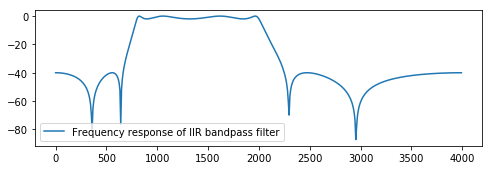

In [17]:
from scipy import signal 

sampling_rate = 8000.
f_max = sampling_rate / 2

# 設計一個帶通濾波器
# 通帶為： 0.2 * 4000 - 0.5 * 4000
# 阻帶為： < 0.1 * 4000, > 0.6 * 4000
# 通帶增益的最大衰減值為 2dB
# 阻帶的最小衰減值為 40dB

b, a = signal.iirdesign(wp = (0.2, 0.5), ws = (0.1, 0.6), gpass = 2, gstop = 40)
# print('b, a: ', b, a)

# 使用 freq 計算濾波器的頻率回應
w, h = signal.freqz(b, a)
# print('w, h: ', w, h )

# 計算增益
power = 20 * np.log10(np.clip(np.abs(h), 1e-8, 1e100))
freq = w / np.pi * f_max
 
plt.figure(figsize = (8, 2.5))    
plt.plot(freq, power, label = 'Frequency response of IIR bandpass filter') 
plt.legend();

#### 將 頻率掃描波 輸入到濾波器中，觀察其 頻率特性

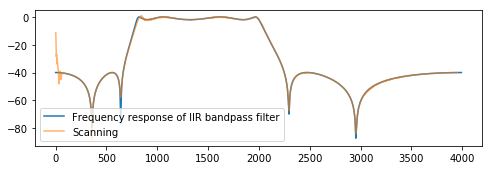

In [14]:
# 產生兩秒鐘的取樣頻率為 sampling_rate Hz 的頻率掃描訊號
# 開始頻率為 0，結束頻率為 sampling_rate / 2
t = np.arange(0, 2, 1/sampling_rate)
sweep = signal.chirp(t, f0 = 0, t1 = 2, f1 = f_max)

# 對頻率掃描訊號進行濾波
out = signal.lfilter(b, a, sweep)

# 將波形轉換為能量
out = 20 * np.log10(np.abs(out))

# 找到所有局部最大值的索引
index = signal.argrelmax(out, order = 3)

# 繪製濾波之後的波形的增益
plt.figure(figsize = (8, 2.5))
plt.plot(freq, power, label = 'Frequency response of IIR bandpass filter')
plt.plot(t[index] / 2. * f_max, out[index], label = 'Scanning', alpha = 0.6)
plt.legend();

### 3.6.3 連續時間線性系統

#### [Laplace Transform 拉普拉斯變換](https://zh.wikipedia.org/wiki/%E6%8B%89%E6%99%AE%E6%8B%89%E6%96%AF%E5%8F%98%E6%8D%A2)  

拉普拉斯變換（英語：Laplace transform）是應用數學中常用的一種積分變換，又名拉氏轉換，其符號為 ${\displaystyle \displaystyle {\mathcal {L}}\left\{f(t)\right\}}$。拉氏變換是一個線性變換，可將一個有引數實數 ${\displaystyle t(t\geq 0)} $ 的函數轉換為一個引數為複數 ${\displaystyle s}$ 的函數：


$F(s) = \int_0^{\infty} f(t) e^{-st} \, dt$

#### [Transfer function 傳遞函數](https://zh.wikipedia.org/wiki/%E4%BC%A0%E9%80%92%E5%87%BD%E6%95%B0)
在工程中，傳遞函數（也稱 系統函數、轉移函數 或 網絡函數，畫出的曲線叫做 傳遞曲線）是用來擬合或描述黑箱模型（系統）的輸入與輸出之間關係的數學表示。  
通常它是零初始條件和零平衡點下，以空間或時間頻率為變量表示的線性時不變系統（LTI）的輸入與輸出之間的關係。 
然而一些資料來源中用「傳遞函數」直接表示某些物理量輸入輸出的特性，（例如二埠網絡中的輸出電壓作為輸入電壓的一個函數）而不使用變換到S平面上的結果。  

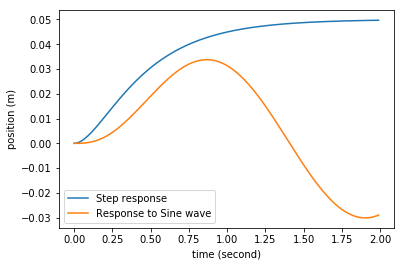

In [58]:
m, b, k = 1., 10., 20.
numerator = [1]
denominator = [m, b, k]
plant = signal.lti(numerator, denominator)  # linear time invariant system

t = np.arange(0, 2, 0.01)
_, x_step = plant.step(T = t)  # 用 t 來步進模擬
_, x_sin, _ = signal.lsim(plant, U = np.sin(np.pi * t), T = t)  # 用 U 作為輸入，測試 plant (LTI) 的反應

plt.plot(t, x_step, label=u"Step response")
plt.plot(t, x_sin, label=u"Response to Sine wave")
plt.legend(loc="best")
plt.xlabel(u"time (second)")
plt.ylabel(u"position (m)");

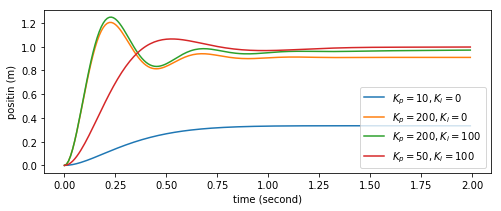

In [61]:
from numbers import Real

def as_sys(s):
    if isinstance(s, Real):
        return SYS([s], [1])
    return s


class SYS:
    
    def __init__(self, num, den):
        self.num = num
        self.den = den
    
    def __mul__(self, s):
        s = as_sys(s)
        num = np.polymul(self.num, s.num)
        den = np.polymul(self.den, s.den)
        return SYS(num, den)
    
    def __add__(self, s):
        s = as_sys(s)
        den = np.polymul(self.den, s.den)
        num = np.polyadd(np.polymul(self.num, s.den), np.polymul(s.num, self.den))
        return SYS(num, den)
    
    def __sadd__(self, s):
        return self + s
    
    def __truediv__(self, s):
        s = as_sys(s)
        return self * SYS(s.den, s.num)
        
    def __iter__(self):
        return iter((self.num, self.den))    
        
    def feedback(self):
        return self / (self + 1)
    
    
    
M, b, k = 1., 10., 20.

plant = SYS([1], [M, b, k])
pi_settings = [(10, 1e-10), (200, 1e-10), (200, 100.), (50, 100.)]
fig, ax = plt.subplots(figsize = (8, 3))

for pi_setting in pi_settings:
    pi_ctrl = SYS(pi_setting, [1, 1e-6])  # PI 控制器的 傳遞函數
    feedback = (pi_ctrl * plant).feedback()  # 整個系統的 傳遞函數，是 PI控制器的傳遞函數 乘上 plant(LTI系統）的傳遞函數
    _, x = signal.step(feedback, T = t)  # 步進模擬
    label = '$K_p = {:d}, K_i = {:3.0f}$'.format(*pi_setting)
    ax.plot(t, x, label = label)
    
ax.legend(loc = 'best', ncol = 1)
ax.set_xlabel('time (second)')
ax.set_ylabel('positin (m)');

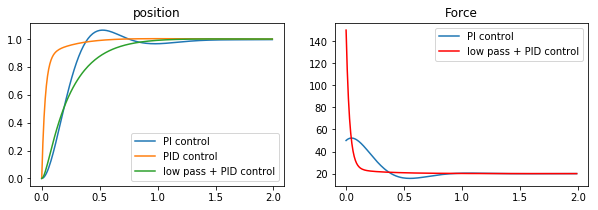

In [52]:
_, f, _ = signal.lsim(pi_ctrl, U = 1 - x, T = t)
kd, kp, ki = 30, 200, 400

pid_ctrl = SYS([kd, kp, ki], [1, 1e-6])  # PID控制器的 傳遞函數
feedback = (pid_ctrl * plant).feedback() # 整個系統的 傳遞函數，是 PID控制器的傳遞函數 乘上 plant(LTI系統）的傳遞函數
_, x2 = signal.step(feedback, T = t)  # 步進模擬

lp = SYS([1], [0.2, 1])  # 低通濾波器的 傳遞函數
lp_feedback = lp * (pid_ctrl * plant).feedback()  # 低通濾波器/PID控制器/plant(LTI系統）的傳遞函數 乘積
_, x3 = signal.step(lp_feedback, T = t)  # 步進模擬

pid_out = (pid_ctrl * lp) / (pid_ctrl * plant + 1)  # PID控制器 輸出的控制力
_, f3 = signal.step(pid_out, T = t)  # 步進模擬


# 滑動區塊的位移以及控制力
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 3))

ax1.plot(t, x, label=u"PI control")
ax1.plot(t, x2, label=u"PID control")
ax1.plot(t, x3, label=u"low pass + PID control")

ax2.plot(t, f, label=u"PI control")
ax2.plot(t, f3, color="r", label=u"low pass + PID control")

ax1.legend(loc="best")
ax2.legend(loc="best")
ax1.set_title(u"position")
ax2.set_title(u"Force");

## 3.7 Interpolate 內插
與擬合不同，插值的結果必須穿過所有的已知點

### 3.7.1 一維內插
interp1d()

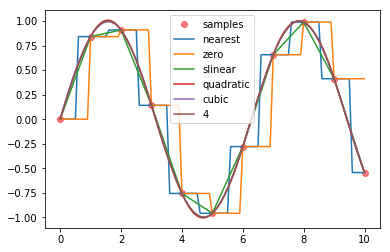

In [3]:
from scipy import interpolate

x = np.linspace(0, 10, 11)
y = np.sin(x)
plt.plot(x, y, 'ro', label = 'samples', alpha = 0.5)

x_new = np.linspace(0, 10, 101)

for kind in ['nearest', 'zero', 'slinear', 'quadratic', 'cubic', 4]:
    f = interpolate.interp1d(x, y, kind = kind)
    plt.plot(x_new, f(x_new), label = str(kind))

plt.legend();

#### 3.7.1.1 外插和 Spline 擬合

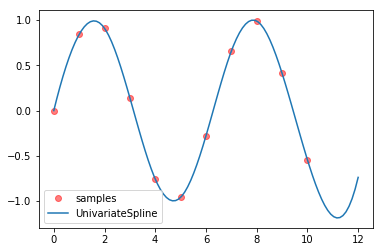

In [4]:
# UnivariateSpline()
x = np.linspace(0, 10, 11)
y = np.sin(x)
plt.plot(x, y, 'ro', label = 'samples', alpha = 0.5)

x_new = np.linspace(0, 12, 101)
f = interpolate.UnivariateSpline(x, y, s = 0)
plt.plot(x_new, f(x_new), label = 'UnivariateSpline')

plt.legend(); 

roots: [  0.055   3.104   6.234   9.345  12.718  15.845  18.907]


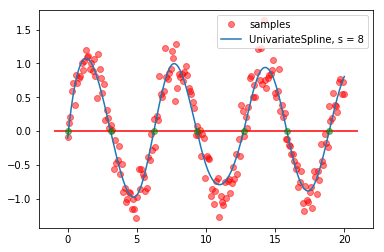

In [11]:
# UnivariateSpline()
x = np.linspace(0, 20, 200)
y = np.sin(x) + np.random.randn(200) * 0.2
plt.plot(x, y, 'ro', label = 'samples', alpha = 0.5)

x_new = np.linspace(0, 20, 2000)
f = interpolate.UnivariateSpline(x, y, s = 8)  # 求 內插函數
plt.plot(x_new, f(x_new), label = 'UnivariateSpline, s = 8')  # s = 8, 擬合曲線不一定通過資料點

roots = f.roots()  # 求 roots
print('roots:', np.array_str(roots, precision = 3))

plt.hlines(0, plt.xlim()[0], plt.xlim()[1], 'red')
plt.plot(roots, np.zeros(len(roots)), 'go', alpha = 0.5)
plt.legend(); 

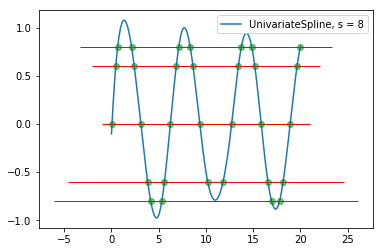

In [24]:
def roots_at(self, v):
    coeff = self.get_coeffs()
    coeff -= v  # 平移
    try:
        return self.roots() 
    finally:
        coeff += v
        
interpolate.UnivariateSpline.roots_at = roots_at
f = interpolate.UnivariateSpline(x, y, s = 8)  # 求 內插函數
plt.plot(x_new, f(x_new), label = 'UnivariateSpline, s = 8')  # s = 8, 擬合曲線不一定通過資料點

for v in [0, 0.6, 0.8, -0.6, -0.8]:
    roots = f.roots_at(v) # 求 roots 
    y_roots = f(roots)
    plt.hlines(v, plt.xlim()[0], plt.xlim()[1], 'r', lw = 1)    
    plt.plot(roots, y_roots, 'go', alpha = 0.5)
    
plt.legend(); 

#### 3.7.1.2 參數內插

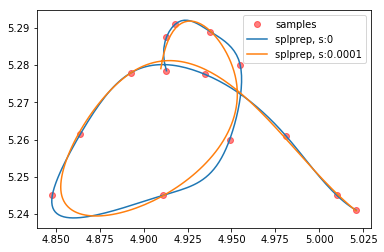

In [41]:
# splprep(), splev()
# 使用 splprep 來內插一段 2D 空間的曲線

x = [ 4.913,  4.913,  4.918,  4.938,  4.955,  4.949,  4.911,
      4.848,  4.864,  4.893,  4.935,  4.981,  5.01 ,  5.021]

y = [ 5.2785,  5.2875,  5.291 ,  5.289 ,  5.28  ,  5.26  ,  5.245 ,
      5.245 ,  5.2615,  5.278 ,  5.2775,  5.261 ,  5.245 ,  5.241]

plt.plot(x, y, 'ro', label = 'samples', alpha = 0.5)

for s in (0, 1e-4):    
    tck, t = interpolate.splprep([x, y], s = s)  # 使用 splprep（）擬合並解出 Bézier curve 的參數，和時間。  s: smoothing condition.
    # tck : (t,c,k) containing the vector of knots, the B-spline coefficients, and the degree of the spline. 
    # t : time use to interpolate
    
    x1, y1 = interpolate.splev(np.linspace(t[0], t[-1], 200), tck = tck)  # 使用 tck, t，計算每個時間點的 x, y
    plt.plot(x1, y1, label = 'splprep, s:' + str(s))
    
plt.legend();

#### 3.7.1.3 [Monotone cubic interpolation 單調內插](https://en.wikipedia.org/wiki/Monotone_cubic_interpolation)
單調性： 擬合曲線的所有 最大值，最小值 都出現在資料點上。  
http://www.csie.ntnu.edu.tw/~u91029/Interpolation.html

In [70]:
xs.shape, ys.shape

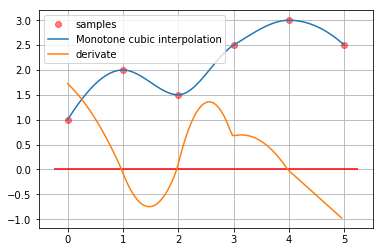

In [76]:
# PchipInterpolator(), pchip()

x = [0, 1, 2, 3, 4, 5]
y = [1, 2, 1.5, 2.5, 3, 2.5]
plt.plot(x, y, 'ro', label = 'samples', alpha = 0.5)

xs = np.linspace(x[0], x[-1], 100)
curve = interpolate.pchip(x, y)  # 單調內插 函數
ys = curve(xs)
# dys = curve.derivative(xs)
dys = np.diff(ys) / np.diff(xs)

plt.plot(xs, ys, label = 'Monotone cubic interpolation')
plt.plot(xs[:-1], dys, label = 'derivate')
plt.hlines(0, plt.xlim()[0], plt.xlim()[1], 'red')
plt.grid()
plt.legend();

### 3.7.2 多維內插

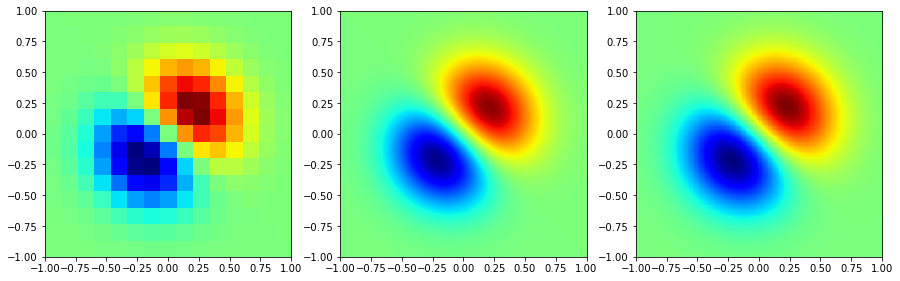

In [109]:
# interp2d()

def func(x, y):
    return (x + y) * np.exp(-5. * (x**2 + y**2))

# X-Y 軸分為 15x15 的網格
x, y = np.mgrid[-1:1:15j, -1:1:15j]
fvals = func(x, y)  # 依據 func 計算數值

func_new = interpolate.interp2d(x, y, fvals, kind = 'quintic')
x_new = np.linspace(-1, 1, 200)
y_new = np.linspace(-1, 1, 200)
fvals_new = func_new(x_new, y_new)

plt.figure(figsize = (15, 5))
plt.subplot(131).imshow(fvals, extent=[-1,1,-1,1], cmap=plt.cm.jet, interpolation='nearest', origin="lower"); 
plt.subplot(132).imshow(fvals, extent=[-1,1,-1,1], cmap=plt.cm.jet, interpolation='quadric', origin="lower"); 
plt.subplot(133).imshow(fvals_new, extent=[-1,1,-1,1], cmap=plt.cm.jet, interpolation='nearest', origin="lower"); 

# plt.legend();

#### 3.7.2.1 griddata

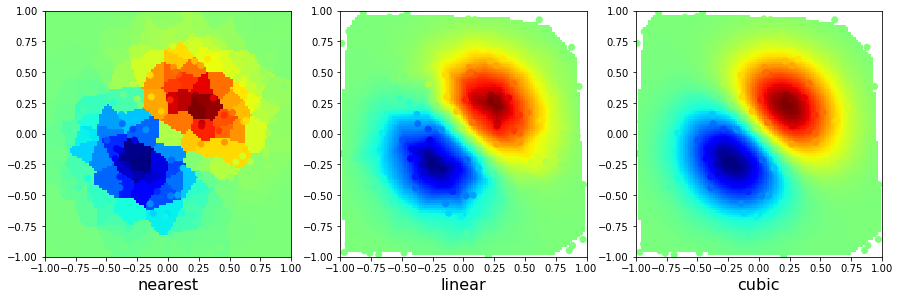

In [127]:
np.random.seed(42)

N = 200
x = np.random.uniform(-1, 1, N)
y = np.random.uniform(-1, 1, N)
z = func(x, y)  # shape = (200,)

xg, yg = np.mgrid[-1:1:100j, -1:1:100j]  # 產生網格
xi = np.c_[xg.ravel(), yg.ravel()]  # 攤平之後合併

methods = ['nearest', 'linear', 'cubic'] 
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for ax, method in zip(axes, methods):    
    ax.scatter(x, y, c = z, cmap = plt.cm.jet)  # 樣本資料點
    zg = interpolate.griddata((x, y), z, xi, method = method).reshape((100, 100))  # s內插之後 交織成為 2D
    ax.imshow(zg, extent = [-1,1,-1,1], cmap = plt.cm.jet, interpolation = 'nearest', origin = "lower")
    ax.set_xlabel(method, fontsize = 16)

#### 3.7.2.2 [Radial Basis Function, RBF (徑向積函數)](https://en.wikipedia.org/wiki/Radial_basis_function)  內插

$y(x) = \sum_{i = 1}^N w_i \, \phi (\lVert x - x_i \rVert)$

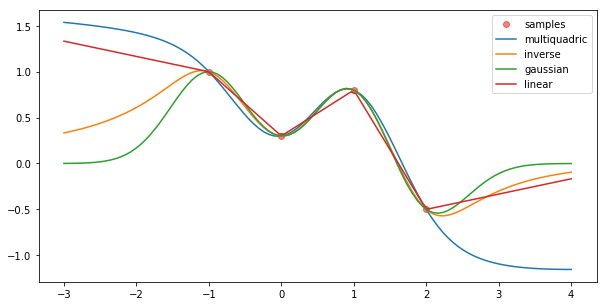

In [145]:
from scipy.interpolate import Rbf

x1 = np.array([-1, 0, 2.0, 1.0])
y1 = np.array([1.0, 0.3, -0.5, 0.8])
nx = np.linspace(-3, 4, 100)

plt.figure(figsize = (10, 5))
plt.plot(x1, y1, 'ro', label = 'samples', alpha = 0.5)

funcs = ['multiquadric', 'inverse', 'gaussian', 'linear']  # 'quintic', 'cubic', 'thin_plate'
for fname in funcs:
    # RBF: A class for radial basis function approximation/interpolation of n-dimensional scattered data.
    rbf = Rbf(x1, y1, function = fname)  # 徑向基函數
    rbf_ys = rbf(nx) 
    plt.plot(nx, rbf_ys, label = fname) 
    
plt.legend();

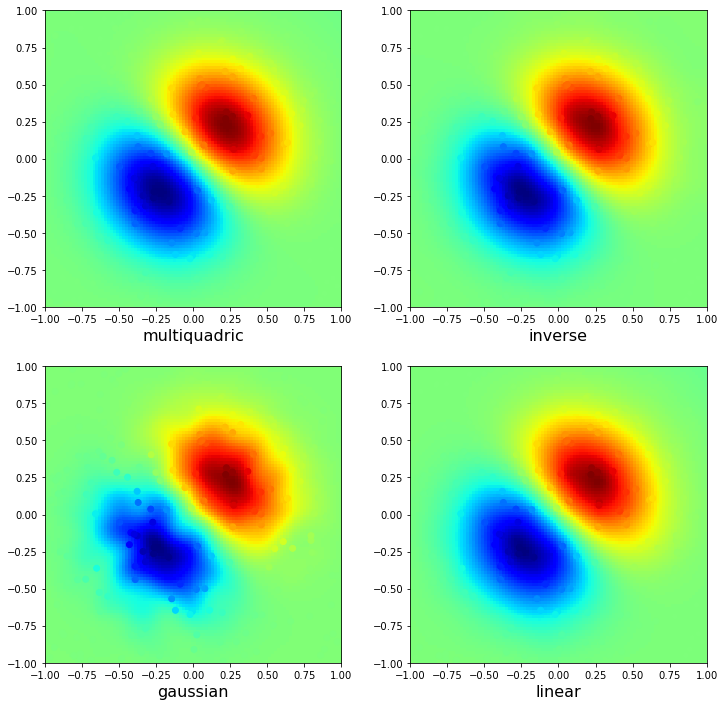

In [159]:
# 2D
fig, axes = plt.subplots(2, 2, figsize = (12, 12))
funcs = ['multiquadric', 'inverse', 'gaussian', 'linear']  # 'quintic', 'cubic', 'thin_plate'

for ax, fname in zip(axes.ravel(), funcs): 
    ax.scatter(x, y, c = z, cmap = plt.cm.jet)  # 樣本資料點
    rbf = Rbf(x, y, z, function = fname)  # 徑向基函數
    zg = rbf(xg, yg).reshape(xg.shape)
    ax.imshow(zg, extent = [-1,1,-1,1], cmap = plt.cm.jet, interpolation = 'nearest', origin = "lower")
    ax.set_xlabel(fname, fontsize = 16)

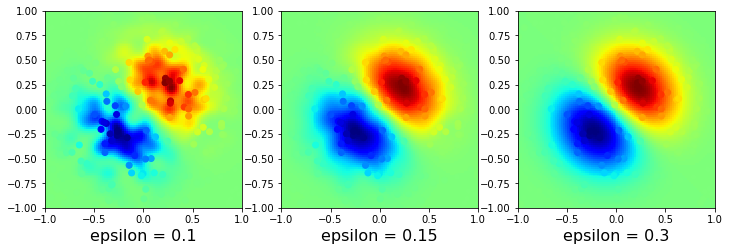

In [165]:
# epsilon

fig, axes = plt.subplots(1, 3, figsize = (12, 4)) 
epsilons = [0.1, 0.15, 0.3]

for ax, epsilon in zip(axes, epsilons): 
    ax.scatter(x, y, c = z, cmap = plt.cm.jet)  # 樣本資料點
    rbf = Rbf(x, y, z, function = 'gaussian', epsilon = epsilon)  # 徑向基函數
    zg = rbf(xg, yg).reshape(xg.shape)
    ax.imshow(zg, extent = [-1,1,-1,1], cmap = plt.cm.jet, interpolation = 'nearest', origin = "lower")
    ax.set_xlabel('epsilon = {}'.format(epsilon), fontsize = 16)

## 3.8 Sparse Matrix 稀疏矩陣

### 3.8.1 稀疏矩陣的儲存形式

In [235]:
# dok_matrix
from scipy import sparse

a = sparse.dok_matrix((100, 100)) 
a.shape

In [236]:
a[2:5, 3] = np.array([1., 2., 3.]).reshape(a[2:5, 3].shape)
a[4:7, 7] = np.array([4., 5., 6.]).reshape(a[4:7, 7].shape)
a.keys()

dict_keys([(2, 3), (3, 3), (4, 3), (4, 7), (5, 7), (6, 7)])

In [237]:
a.values()

dict_values([1.0, 2.0, 3.0, 4.0, 5.0, 6.0])

In [238]:
a.toarray()

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [239]:
# lil_matrix
b = sparse.lil_matrix((10, 10))
b.shape

In [240]:
b[2:5, 3] = np.array([1., 2., 3.]).reshape(b[2:5, 3].shape)
b[4:7, 7] = np.array([4., 5., 6.]).reshape(b[4:7, 7].shape)
b.rows

array([[], [], [3], [3], [3, 7], [7], [7], [], [], []], dtype=object)

In [241]:
b.data

array([[], [], [1.0], [2.0], [3.0, 4.0], [5.0], [6.0], [], [], []], dtype=object)

In [242]:
b.toarray()

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  2.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  3.,  0.,  0.,  0.,  4.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  5.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  6.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

In [243]:
# coo_matrix
row = [2, 3, 3, 2]
col = [3, 4, 2, 3]
data = [1, 2, 3, 10]
# 可重複出現，重複的元素會加總。上例中 e(2, 3) 出現兩次，1 + 10 = 11
c = sparse.coo_matrix((data, (row, col)), shape = (10, 10))
c.shape

In [244]:
c.row, c.col, c.data

(array([2, 3, 3, 2], dtype=int32),
 array([3, 4, 2, 3], dtype=int32),
 array([ 1,  2,  3, 10]))

In [245]:
c.toarray()

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 11,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  3,  0,  2,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0]])

### 3.8.2 最短路徑
scipy.sparse.scgraph ？

In [251]:
# 網路圖

w = sparse.dok_matrix((4, 4))

edges = [(0, 1, 10), (1, 2, 5), (0, 2, 3),
         (2, 3,  7), (3, 0, 4), (3, 2, 6)]

for i, j, v in edges:
    w[i, j] = v

w.todense()

matrix([[  0.,  10.,   3.,   0.],
        [  0.,   0.,   5.,   0.],
        [  0.,   0.,   0.,   7.],
        [  4.,   0.,   6.,   0.]])

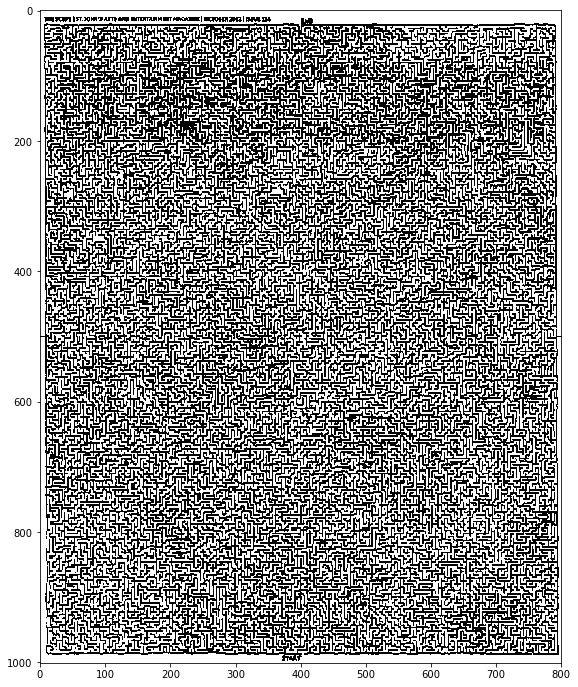

In [252]:
bimg = plt.imread("tmp.png") 
plt.figure(figsize = (12, 12))
plt.imshow(bimg)

## 3.9 ndimage 影像處理

### 3.9.1 Morphology 形態學影像處理

In [334]:
x = np.array([[1,2],[3,4]])
x

array([[1, 2],
       [3, 4]])

In [336]:
np.repeat(x, 2, axis = 0)

array([[1, 2],
       [1, 2],
       [3, 4],
       [3, 4]])

In [338]:
np.repeat(np.repeat(x, 2, axis = 0), 2, axis = 1)

array([[1, 1, 2, 2],
       [1, 1, 2, 2],
       [3, 3, 4, 4],
       [3, 3, 4, 4]])

In [ ]:
np.repeat(x, 2, axis = 1)

In [411]:
def expand_image(img, value, out = None, size = 10):  
    
    if out is None:
        w, h = img.shape
        out = np.zeros((w * size, h * size), dtype = np.uint8)  # 建立一個空的 2D 矩陣, 行列都是原來 image 的 size 倍, 值為 0
    
    # 複製原來的 img，行列兩個方向都 element-wise repeat "size" 次，也就是放大 size 倍
    tmp = np.repeat(np.repeat(img, repeats = size, axis = 0), repeats = size, axis = 1)    
    out[:, :] = np.where(tmp, value, out)  # 如果原本有值，則以 value(155) 取代，否則為0    
    out[::size, :] = 0  # 每隔 size 列 劃一條黑線    
    out[:, ::size] = 0  # 每隔 size 行 劃一條黑線
    return out        


def show_image(*imgs):
    for idx, img in enumerate(imgs, start = 1):
        ax = plt.subplot(1, len(imgs), idx)
        plt.imshow(img, cmap = 'gray')
        ax.set_axis_off()
        
    plt.subplots_adjust(0.02, 0., 0.98, 1., 0.02, 0.)

#### 3.9.1.1 膨脹與鏽蝕

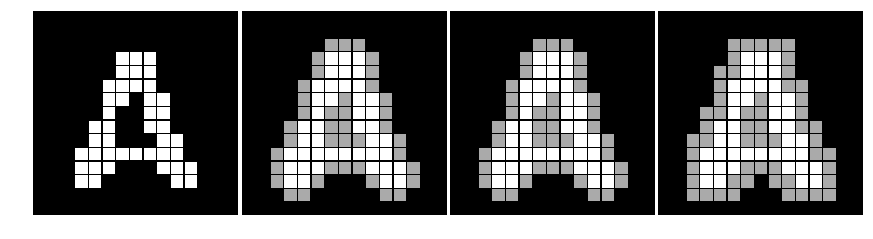

In [416]:
from scipy.ndimage import morphology

def dilation_demo(a, structure = None):
    b = morphology.binary_dilation(a, structure)  # morphology.binary_dilation
    img = expand_image(a, 225)  # 把 a 放大 10 倍，並以 225 取代原本有值的元素
    
    # 把 a XOR b 的結果，以 150 為值，覆蓋 a的放大圖
    # a, b 兩圖中皆為白色者，色階為 225, 一黑一白者 為灰色，色階為 150
    return expand_image(np.logical_xor(a, b), 150, out = img)

a = plt.imread('scipy_morphology_demo.png')[:, :, 0].astype(np.uint8)  # a是一個 15x15 的字元點陣圖
img1 = expand_image(a, 155);  # a 放大 10倍，成為 150x150的點陣圖，以 155為白色值
img2 = dilation_demo(a);  # 把 a 與 其經過 morphology.binary_dilation 之後的結果作 XOR ，XOR結果為True的元素塗成灰色
img3 = dilation_demo(a, [[0, 1, 0, ], [1, 1, 1,], [0, 1, 0,]])
img4 = dilation_demo(a, [[1, 1, 1, ], [1, 1, 1,], [1, 1, 1,]])
 
plt.figure(figsize = (12, 12));
show_image(img1, img2, img3, img4);

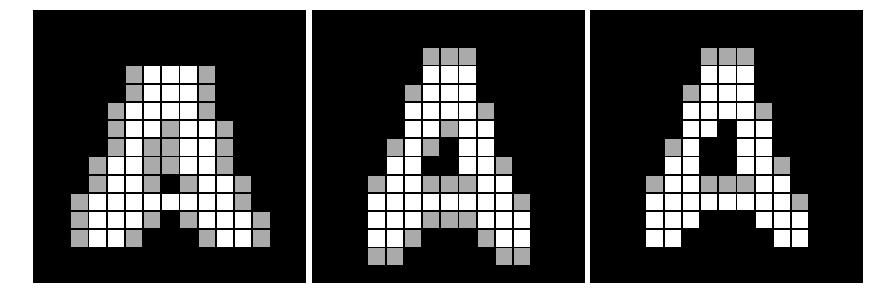

In [418]:
img1 = dilation_demo(a, [[0, 0, 0], [1, 1, 1], [0, 0, 0]])
img2 = dilation_demo(a, [[0, 1, 0], [0, 1, 0], [0, 1, 0]])
img3 = dilation_demo(a, [[0, 1, 0], [0, 1, 0], [0, 0, 0]])

plt.figure(figsize = (12, 12));
show_image(img1, img2, img3);

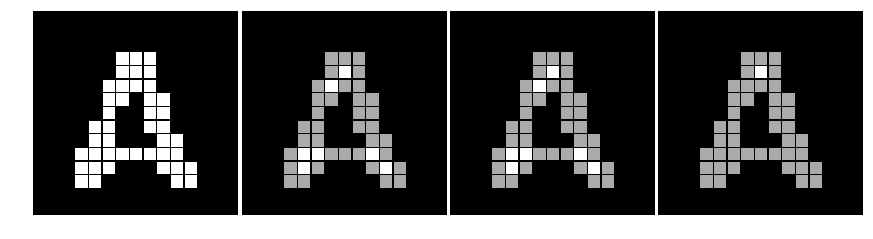

In [419]:
def erosion_demo(a, structure = None):
    b = morphology.binary_erosion(a, structure)  # morphology.binary_dilation
    img = expand_image(a, 225)  # 把 a 放大 10 倍，並以 225 取代原本有值的元素
    
    # 把 a XOR b 的結果，以 150 為值，覆蓋 a的放大圖
    # a, b 兩圖中皆為白色者，色階為 225, 一黑一白者 為灰色，色階為 150
    return expand_image(np.logical_xor(a, b), 150, out = img)


img1 = expand_image(a, 155);  # a 放大 10倍，成為 150x150的點陣圖，以 155為白色值
img2 = erosion_demo(a);  # 把 a 與 其經過 morphology.binary_dilation 之後的結果作 XOR ，XOR結果為True的元素塗成灰色
img3 = erosion_demo(a, [[0, 1, 0, ], [1, 1, 1,], [0, 1, 0,]])
img4 = erosion_demo(a, [[1, 1, 1, ], [1, 1, 1,], [1, 1, 1,]])
 
plt.figure(figsize = (12, 12));
show_image(img1, img2, img3, img4);

#### 3.9.1.2 Hit and Miss

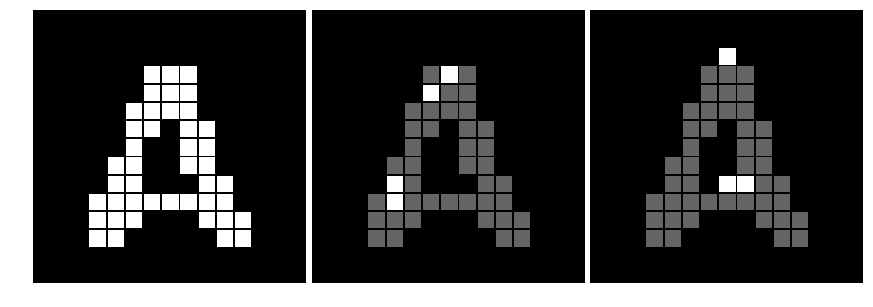

In [425]:
def hit_or_miss_demo(a, structure1 = None, structure2 = None,):
    b = morphology.binary_hit_or_miss(a, structure1, structure2)  # morphology.binary_dilation
    img = expand_image(a, 100)  # 把 a 放大 10 倍，並以 100 取代原本有值的元素    
    return expand_image(b, 255, out = img)  # hit 的元素化為 255 


img1 = expand_image(a, 155);  # a 放大 10倍，成為 150x150的點陣圖，以 155為白色值
# img2 = hit_or_miss_demo(a);  # 把 a 與 其經過 morphology.binary_dilation 之後的結果作 XOR ，XOR結果為True的元素塗成灰色
img2 = hit_or_miss_demo(a, [[0, 0, 0], [0, 1, 0], [1, 1, 1]], [[1, 0, 0], [0, 0, 0], [0, 0, 0]])
img3 = hit_or_miss_demo(a, [[0, 0, 0], [0, 0, 0], [1, 1, 1]], [[1, 0, 0], [0, 1, 0], [0, 0, 0]])

plt.figure(figsize = (12, 12));
show_image(img1, img2, img3);

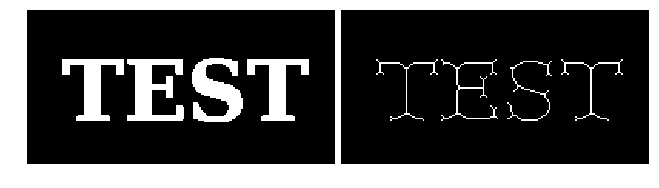

In [429]:
# 細線化

#%fig=使用Hit和Miss進行細線化運算
def skeletonize(img):
    h1 = np.array([[0, 0, 0],[0, 1, 0],[1, 1, 1]]) # 對應左邊的元素
    m1 = np.array([[1, 1, 1],[0, 0, 0],[0, 0, 0]]) 
    h2 = np.array([[0, 0, 0],[1, 1, 0],[0, 1, 0]]) # 對應右邊的元素
    m2 = np.array([[0, 1, 1],[0, 0, 1],[0, 0, 0]])    
    
    hit_list = [] 
    miss_list = []
    
    for k in range(4): # 將這些結構進行 90, 180, 270 度旋轉之後 獲得 8個結構元素
        hit_list.append(np.rot90(h1, k))
        hit_list.append(np.rot90(h2, k))
        miss_list.append(np.rot90(m1, k))
        miss_list.append(np.rot90(m2, k))    
        
    img = img.copy()
    
    while True:
        last = img
        for hit, miss in zip(hit_list, miss_list): 
            hm = morphology.binary_hit_or_miss(img, hit, miss) # 使用 hit + miss 結構來運算
            # 從圖形中移除hit_or_miss所得到的白色點
            # 效果就是依次從8個方向刪除影像邊緣上的像素
            img = np.logical_and(img, np.logical_not(hm)) #
        # 若果處理之後的圖形和處理前的圖形相同，則結束處理
        if np.all(img == last): # 一直處理到無法再精簡為止
            break
            
    return img

a = plt.imread("scipy_morphology_demo2.png")[:,:,0].astype(np.uint8)
b = skeletonize(a)

#%hide
_, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 3))
ax1.imshow(a, cmap="gray", interpolation="nearest")
ax2.imshow(b, cmap="gray", interpolation="nearest")
ax1.set_axis_off()
ax2.set_axis_off()
plt.subplots_adjust(0.02, 0, 0.98, 1, 0.02, 0)

### 3.9.2 影像分割

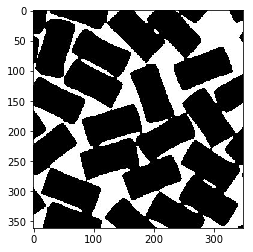

In [470]:
squares = plt.imread('suqares.jpg')
plt.imshow(squares)
squares.shape

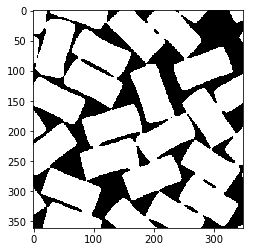

In [471]:
squares = (squares[:, :, 0] < 200).astype(np.uint8)
plt.imshow(squares, cmap = 'gray');

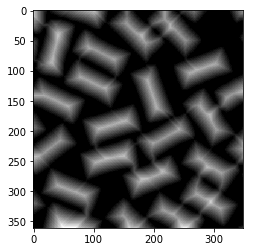

In [472]:
from scipy.ndimage import morphology

# Distance transform for chamfer type of transforms.
squares_dt = morphology.distance_transform_cdt(squares)  # 每個像素 到最近的黑色像素的距離
plt.imshow(squares_dt, cmap = 'gray')

In [473]:
np.unique(squares_dt)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27], dtype=int32)

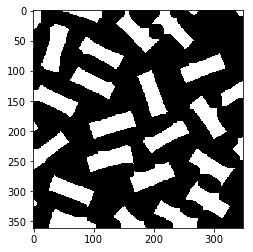

In [478]:
squares_core = (squares_dt > 8).astype(np.uint8) 
plt.imshow(squares_core, cmap = 'gray');

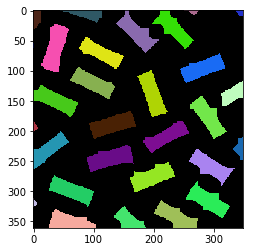

In [493]:
from scipy.ndimage.measurements import label, center_of_mass

def random_palette(labels, count, seed = 1):
    np.random.seed(seed)
    palette = np.random.rand(count + 1, 3)  # 產生色卡
    palette[0, :] = 0  # 第一個色卡為黑色（0, 0, 0)
    return palette[labels]  # 上色

labels, count = label(squares_core)  # 標註每一個 白色區塊
h, w = labels.shape  
centers = np.array(center_of_mass(labels, labels, index = range(1, count + 1)), np.int)  # 各個區塊的中心點
cores = random_palette(labels, count)  # 上色之後的區塊
plt.imshow(cores);

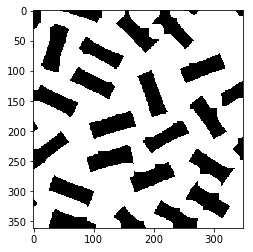

In [497]:
plt.imshow(1-squares_core, cmap = 'gray');

In [494]:
index = morphology.distance_transform_cdt(1-squares_core, 
                                          return_distances=False, 
                                          return_indices=True) # 將黑白反轉之後，求出距離最近的黑色像素的距離
near_labels = labels[index[0], index[1]]  # 每個像素的 label 

mask = (squares - squares_core).astype(bool)  # 需要補回來的像素
labels2 = labels.copy()
labels2[mask] = near_labels[mask]  # 標定mask的 區塊歸屬
separated = random_palette(labels2, count)  # 上色

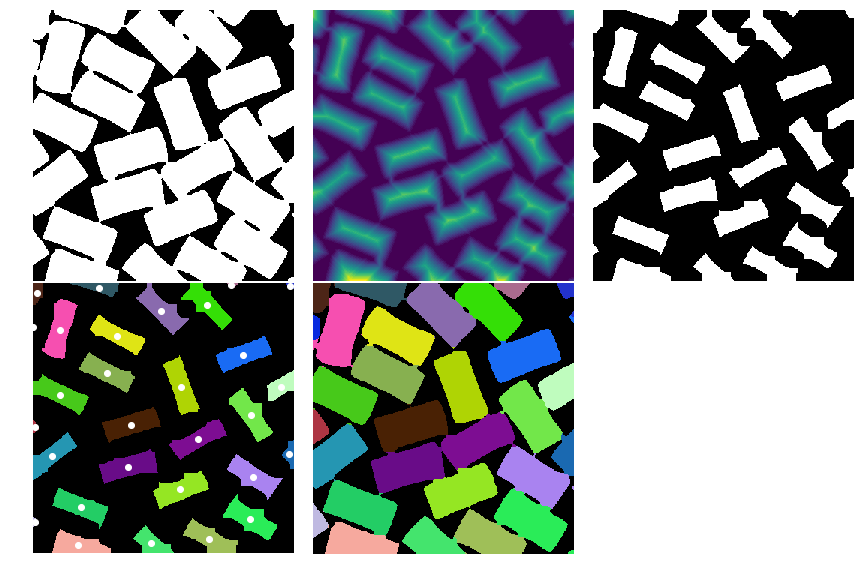

In [499]:
#%figonly=矩形區域分割算法各個步驟的輸出圖形
fig, axes = plt.subplots(2, 3, figsize=(15, 10), )
fig.delaxes(axes[1, 2])
axes[0, 0].imshow(squares, cmap="gray");
axes[0, 1].imshow(squares_dt)
axes[0, 2].imshow(squares_core, cmap="gray")
ax = axes[1, 0]
ax.imshow(cores)
center_y, center_x = centers.T
ax.plot(center_x, center_y, "o", color="white")
ax.set_xlim(0, w)
ax.set_ylim(h, 0)

axes[1, 1].imshow(separated)

for ax in axes.ravel():
    ax.axis("off")
    
fig.subplots_adjust(wspace=0.01, hspace=0.01)

## 3.10 spatial 空間演算法函數庫

### 3.10.1 計算最近旁點

In [507]:
x = np.sort(np.random.rand(100))
idx = np.searchsorted(x, 0.5)
x[idx-1: idx+1]

array([ 0.49958417,  0.50851624])

#### [K-d tree](https://zh.wikipedia.org/wiki/K-d%E6%A0%91) 在 N 維空間中尋找最接近的點

In [3]:
from scipy import spatial

np.random.seed(42)
N = 100
points = np.random.uniform(-1, 1, (N, 2))
kd = spatial.cKDTree(points)  # cKDTree 物件

targets = np.array([(0, 0), (0.5, 0.5), (-0.5, 0.5), (0.5, -0.5), (-0.5, -0.5)])  # 計算最接近targets的點
dist, idx = kd.query(targets, k = 3)
dist, idx 

(array([[ 0.15188266,  0.21919416,  0.27647793],
        [ 0.09595807,  0.15745334,  0.22855398],
        [ 0.05009422,  0.17583445,  0.1807312 ],
        [ 0.11180181,  0.16618122,  0.18127473],
        [ 0.19015485,  0.19060739,  0.19361173]]), array([[48, 73, 81],
        [37, 78, 43],
        [79, 22, 92],
        [35, 58,  6],
        [83,  7, 42]]))

In [5]:
r = 0.2
idx2 = kd.query_ball_point(targets, r)
idx2

array([[48], [37, 78], [22, 79, 92], [6, 35, 58], [7, 42, 55, 83]], dtype=object)

In [7]:
idx3 = kd.query_pairs(0.1) - kd.query_pairs(0.08)
idx3

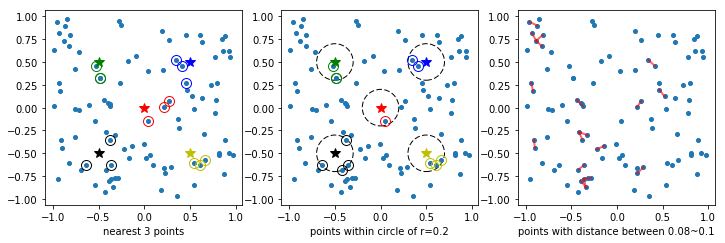

In [11]:
#%figonly=用cKDTree尋找近旁點
x, y = points.T
colors = "r", "b", "g", "y", "k"

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))

# 標定所有資料點
for ax in ax1, ax2, ax3:
    ax.set_aspect("equal")
    ax.plot(x, y, "o", markersize=4)
    
# 標定 targets
for ax in ax1, ax2:
    for i in range(len(targets)):
        c = colors[i]
        tx, ty = targets[i]
        ax.plot([tx], [ty], "*", markersize=10, color=c)


for i in range(len(targets)):
    # 每個 target 最近的3個點
    nx, ny = points[idx[i]].T
    ax1.plot(nx, ny, "o", markersize=10, markerfacecolor="None", 
             markeredgecolor=colors[i], markeredgewidth=1)
    
    # 每個 target 半徑 0.2 之內的點
    nx, ny = points[idx2[i]].T
    ax2.plot(nx, ny, "o", markersize=10, markerfacecolor="None", 
             markeredgecolor=colors[i], markeredgewidth=1)
    
    # 劃上半徑的圓形
    ax2.add_artist(plt.Circle(targets[i], r, fill=None, linestyle="dashed"))
    
    
# 劃上紅線
for pidx1, pidx2 in idx3:
    sx, sy = points[pidx1]
    ex, ey = points[pidx2]
    ax3.plot([sx, ex], [sy, ey], "r", linewidth=2, alpha=0.6)  # 劃上紅線
    
ax1.set_xlabel(u"nearest 3 points")
ax2.set_xlabel(u"points within circle of r=0.2")
ax3.set_xlabel(u"points with distance between 0.08~0.1");

In [13]:
from scipy.spatial import distance

dist1 = distance.squareform(distance.pdist(points))  # 計算一組點中 每對點的距離
dist2 = distance.cdist(points, targets)  # 計算兩組點中 每對點的距離
dist1.shape, dist2.shape

In [16]:
np.min(dist2, axis = 0)

array([ 0.15188266,  0.09595807,  0.05009422,  0.11180181,  0.19015485])

In [17]:
dist[:, 0]

array([ 0.15188266,  0.09595807,  0.05009422,  0.11180181,  0.19015485])

In [25]:
 np.unravel_index(np.argmin(dist1), dist1.shape) 

(22, 92)

In [26]:
dist1[np.diag_indices(len(points))] = np.inf  # 將每個點 自己對自己的距離設定為 無限大
nearest_pair = np.unravel_index(np.argmin(dist1), dist1.shape)  # dist1 中的最小值 的 index，轉換為 2D 的 index
nearest_pair, dist1[nearest_pair]  # 最近兩點的 indice

((22, 92), 0.0053462102481582454)

In [27]:
dist, idx = kd.query(points, 2)  # 每兩點之間的距離
idx[np.argmin(dist[:, 1])], np.min(dist[:, 1])

(array([22, 92]), 0.0053462102481582454)

#### 任一時間，線上使用者數量

In [57]:
N = 100
start = np.random.uniform(0, 100, N)
span = np.random.normal(40, 10, N)
span = np.clip(span, 2, 100)
end = start + span

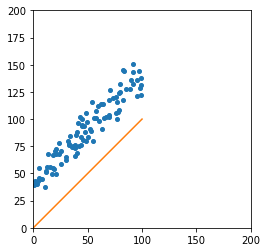

In [62]:
def naive_count_at(start, end, time):
    mask = np.logical_and(start < time, end > time)
    return np.sum(mask)

plt.plot(start, end, 'o', markersize = 4, );
plt.plot([0,100], [0, 100])
plt.gca().set_aspect('equal')
plt.xlim(0, 200)
plt.ylim(0, 200);

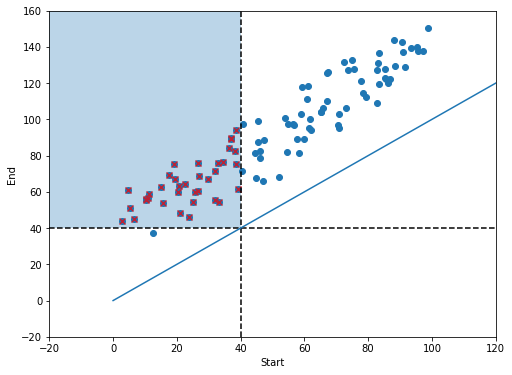

In [55]:
#%figonly=使用二維K-d樹搜尋指定區間的線上使用者
def _():
    # 產生樣本資料
    N = 100
    start = np.random.uniform(0, 100, N)
    span = np.random.normal(40, 10, N)
    span = np.clip(span, 2, 100)
    end = start + span

    # 要查詢的時間點
    time = 40
    
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.scatter(start, end)  # scatter 圖
    
    # time = 40 的實後，線上的使用者
    mask = (start < time) & (end > time)
    start2, end2 = start[mask], end[mask]
    ax.scatter(start2, end2, marker="x", color="red")
    
    # 藍色標示方塊
    rect = plt.Rectangle((-20, 40), 60, 120, alpha=0.3)    
    ax.add_patch(rect)
    
    # 區塊標示線
    ax.axhline(time, color="k", ls="--")
    ax.axvline(time, color="k", ls="--")
    
    ax.set_xlabel("Start")
    ax.set_ylabel("End")
    ax.set_xlim(-20, 120)
    ax.set_ylim(-20, 160)
    ax.plot([0, 120], [0, 120])

_()

In [63]:
class KdSearch:
    def __init__(self, start, end, leafsize = 10):
        self.tree = spatial.cKDTree(np.c_[start, end], leafsize = leafsize)  # 用 start, end 的時間點資料, 建立 K-d tree 模型
        self.max_time = np.max(end)
        
    def count_at(self, time): 
        to_search = spatial.cKDTree([[time - self.max_time, time + self.max_time]])
        return self.tree.count_neighbors(to_search, self.max_time, p = np.inf)  # 計算某個正方形區域之內的點數
    
naive_count_at(start, end, 40) == KdSearch(start, end).count_at(40)

True

In [65]:
%timeit naive_count_at(start, end, 40)
kd = KdSearch(start, end)
%timeit kd.count_at(40)  # 沒有比較快啊？!

The slowest run took 5.35 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 12.5 µs per loop
10000 loops, best of 3: 54.4 µs per loop


### 3.10.2 [Convex Hull](https://en.wikipedia.org/wiki/Convex_hull) [凸包](https://zh.wikipedia.org/wiki/%E5%87%B8%E5%8C%85)

In [88]:
np.random.seed(42)
points2d = np.random.rand(10, 2)  # 產生 10 個點
ch2d = spatial.ConvexHull(points2d)  # 凸包
ch2d.simplices, ch2d.vertices  # edges 和 頂點

(array([[2, 5],
        [2, 6],
        [0, 5],
        [1, 6],
        [1, 0]], dtype=int32), array([5, 2, 6, 1, 0], dtype=int32))

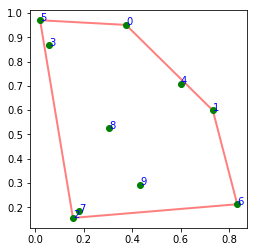

In [95]:
#%fig=二維平面上的凸包
poly = plt.Polygon(points2d[ch2d.vertices], fill=None, lw=2, color="r", alpha=0.5) # 繪製 多邊形
ax = plt.subplot(aspect="equal")
plt.plot(points2d[:, 0], points2d[:, 1], "go")  # 所有資料點
for i, pos in enumerate(points2d):
    plt.text(pos[0], pos[1], str(i), color="blue")  # 標示編號
ax.add_artist(poly);

In [96]:
np.random.seed(42)
points3d = np.random.rand(40, 3)
ch3d = spatial.ConvexHull(points3d)
ch3d.simplices.shape

In [97]:
#%fig=3D空間中的凸包
# from scpy2 import vtk_convexhull, vtk_scene, vtk_scene_to_array
# actors = vtk_convexhull(ch3d)
# scene = vtk_scene(actors, viewangle=22)
# %array_image vtk_scene_to_array(scene)
# scene.close()

### 3.10.3 [Voronoi Diagram](https://en.wikipedia.org/wiki/Voronoi_diagram) [沃羅諾伊圖](https://zh.wikipedia.org/wiki/%E6%B2%83%E7%BD%97%E8%AF%BA%E4%BC%8A%E5%9B%BE)

In [98]:
points2d = np.array([[0.2, 0.1], [0.5, 0.5], [0.8, 0.1],
                     [0.5, 0.8], [0.3, 0.6], [0.7, 0.6], [0.5, 0.35]])

vo = spatial.Voronoi(points2d)
vo.vertices; vo.regions; vo.ridge_vertices

In [99]:
bound = np.array([[-100, -100], [-100,  100], 
                  [ 100,  100], [ 100, -100]])

vo2 = spatial.Voronoi(np.vstack((points2d, bound)))

/home/wei/anaconda3/lib/python3.6/site-packages/scipy/spatial/_plotutils.py:17: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  was_held = ax.ishold()
/home/wei/anaconda3/lib/python3.6/site-packages/scipy/spatial/_plotutils.py:19: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(True)
/home/wei/anaconda3/lib/python3.6/site-packages/scipy/spatial/_plotutils.py:22: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(was_held)


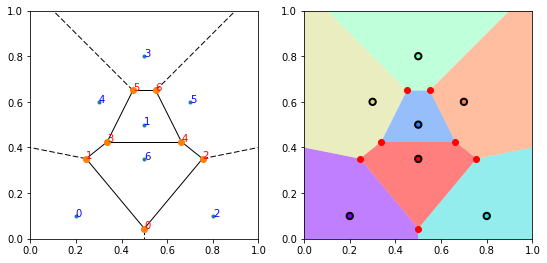

In [104]:
#%figonly=沃羅諾伊圖將空間分割為多個區域
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 4.5))
ax1.set_aspect("equal")
ax2.set_aspect("equal")
spatial.voronoi_plot_2d(vo, ax=ax1)
for i, v in enumerate(vo.vertices):
    ax1.text(v[0], v[1], str(i), color="red")
    
for i, p in enumerate(points2d):
    ax1.text(p[0], p[1], str(i), color="blue")

n = len(points2d)
color = plt.cm.rainbow(np.linspace(0, 1, n))
for i in range(n):
    idx = vo2.point_region[i]
    region = vo2.regions[idx]
    poly = plt.Polygon(vo2.vertices[region], facecolor=color[i], alpha=0.5, zorder=0)
    ax2.add_artist(poly)
    
ax2.scatter(points2d[:, 0], points2d[:, 1], s=40, c=color, linewidths=2, edgecolors="k")
ax2.plot(vo2.vertices[:, 0], vo2.vertices[:, 1], "ro", ms=6)

for ax in ax1, ax2:
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)

In [78]:
print(vo.point_region)
print(vo.regions[6])

[0 3 1 7 4 6 5]
[6, -1, 2, 4]


r =  0.174278456762 , center =  [ 0.46973363  0.59356531]


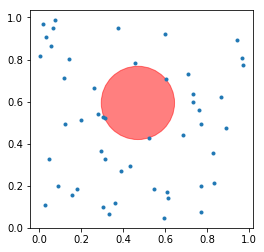

In [83]:
#%fig=使用沃羅諾伊圖計算最大空圓
from collections import defaultdict

n = 50
np.random.seed(42)
points2d = np.random.rand(n, 2)
vo = spatial.Voronoi(points2d)
ch = spatial.ConvexHull(points2d)
poly = plt.Polygon(points2d[ch.vertices]) #❶
vs = vo.vertices
convexhull_mask = [poly.contains_point(p, radius=0) for p in vs] #❷

vertice_point_map = defaultdict(list) #❸
for index_point, index_region in enumerate(vo.point_region):
    region = vo.regions[index_region]
    if -1 in region: continue
    for index_vertice in region:
        if convexhull_mask[index_vertice]:
            vertice_point_map[index_vertice].append(index_point)

def dist(p1, p2):
    return ((p1-p2)**2).sum()**0.5

max_cicle = max((dist(points2d[pidxs[0]], vs[vidx]), vs[vidx]) #❹
                for vidx, pidxs in vertice_point_map.items())
r, center = max_cicle
print("r = ", r, ", center = ", center)
#%hide
ax = plt.subplot(111, aspect="equal")
ax.plot(points2d[:, 0], points2d[:, 1], ".")

c = plt.Circle(center, r, fill=True, color="red", alpha=0.5)
ax.add_artist(c);

### 3.10.4 [Delaunay triangulation](https://en.wikipedia.org/wiki/Delaunay_triangulation)  [德勞內三角形](https://zh.wikipedia.org/wiki/%E5%BE%B7%E5%8B%9E%E5%85%A7%E4%B8%89%E8%A7%92%E5%8C%96)

In [85]:
x = np.array([46.445, 263.251, 174.176, 280.899, 280.899, 
              189.358, 135.521, 29.638, 101.907, 226.665])
y = np.array([287.865, 250.891, 287.865, 160.975, 54.252,
              160.975, 232.404, 179.187, 35.765, 71.361])
points2d = np.c_[x, y]
dy = spatial.Delaunay(points2d)
vo = spatial.Voronoi(points2d) 

dy.simplices; vo.vertices

array([[ 104.58977484,  127.03566055],
       [ 235.1285    ,  198.68143374],
       [ 107.83960707,  155.53682482],
       [  71.22104881,  228.39479887],
       [ 110.3105    ,  291.17642838],
       [ 201.40695449,  227.68436282],
       [ 201.61895891,  226.21958623],
       [ 152.96231864,   93.25060083],
       [ 205.40381294,  -90.5480267 ],
       [ 235.1285    ,  127.45701644],
       [ 267.91709907,  107.6135    ]])

/home/wei/anaconda3/lib/python3.6/site-packages/scipy/spatial/_plotutils.py:17: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  was_held = ax.ishold()
/home/wei/anaconda3/lib/python3.6/site-packages/scipy/spatial/_plotutils.py:19: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(True)
/home/wei/anaconda3/lib/python3.6/site-packages/scipy/spatial/_plotutils.py:22: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(was_held)


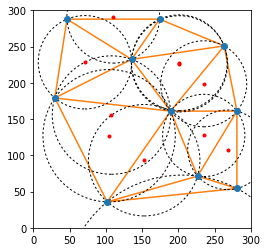

In [87]:
#%fig=德勞內三角形的外接圓與圓心
cx, cy = vo.vertices.T

ax = plt.subplot(aspect="equal")
spatial.delaunay_plot_2d(dy, ax=ax)
ax.plot(cx, cy, "r.")
for i, (cx, cy) in enumerate(vo.vertices):
    px, py = points2d[dy.simplices[i, 0]]
    radius = np.hypot(cx - px, cy - py)
    circle = plt.Circle((cx, cy), radius, fill=False, ls="dotted")
    ax.add_artist(circle)
ax.set_xlim(0, 300)
ax.set_ylim(0, 300);